## สรุปอัลกอริทึมและปัญหาในบทวางแผน (Planning)

> บทนี้สรุปกรอบปัญหา วิธีแทนการกระทำ และอัลกอริทึมแก้ปัญหาทั้งแบบคลาสสิกและในโลกความจริง เพื่อเป็นภาพรวมก่อนลงรายละเอียดและตัวอย่างโค้ด

### วางแผนแบบคลาสสิก (Classical Planning)
- PlanningProblem: แบบจำลองประกอบด้วย (1) สถานะเป็นเซตรายข้อเท็จจริง (literals) (2) สถานะเริ่มต้น (3) ชุดการกระทำที่มีเงื่อนไขก่อนทำ/ผลกระทบ (preconditions/effects) (4) การทดสอบเป้าหมาย และอาจมีต้นทุน
  - สไตล์ค้นหาหลัก: เดินหน้า (progression) จากสถานะเริ่มต้น และ ถอยกลับ (regression) จากเงื่อนไขเป้าหมาย
- Action (ตัวดำเนินการแบบ STRIPS): กำหนดด้วย Precondition, Add effects, Delete effects
  - ใช้ได้เมื่อ preconditions เป็นจริง; สถานะถัดไป = (สถานะ − delete) ∪ add

- ปัญหาวางแผนตัวอย่าง
  - Air cargo problem: ขนส่งสินค้าโดยโหลด/บิน/ขนถ่าย แสดงปฏิสัมพันธ์ของเป้าหมายย่อยและศักยภาพการทำงานแบบขนาน
  - Spare tire problem: เปลี่ยนยางแบนด้วยยางอะไหล่ เน้นการใช้ทรัพยากรและผลลบ (delete effects)
  - Three block tower problem: เรียงบล็อกให้เป็นหอคอย เน้นข้อจำกัดลำดับ (ordering) และตัวบ่งชี้ “clear”
  - Shopping Problem: ซื้อของหลายรายการ เป้าหมายย่อยจำนวนมากค่อนข้างอิสระ จัดลำดับได้ยืดหยุ่น มีโอกาสทำขนาน
  - Socks and shoes problem: ต้องใส่ถุงเท้าก่อนรองเท้า แต่ซ้าย/ขวาอิสระ เป็นตัวอย่างคลาสสิกของแผนลำดับบางส่วน (partial order)
  - Cake problem: อยาก “มีเค้ก” และ “กินเค้ก” พร้อมกัน แสดงการชนกันของเป้าหมายและความจำเป็นต้องทำซ้ำ เช่น อบใหม่เพื่อให้มีเค้กอีกครั้ง

- วิธีแก้ปัญหา
  - GraphPlan: สร้าง planning graph สลับชั้น literal/action พร้อมความกีดกัน (mutex) จากนั้นค้นย้อนเพื่อดึงแผนขนาน เมื่อเป้าหมายปรากฏโดยไม่ mutex ถ้ายังไม่ได้ให้ขยายชั้นต่อจนได้คำตอบหรือถึงจุดคงที่ (fixpoint)
  - Linearize: แปลงแผนลำดับบางส่วนให้เป็นลำดับทั้งหมดที่สอดคล้องกับ causal links/ข้อจำกัด (เช่น topological sort)
  - PartialOrderPlanner (POP): ค้นหาในพื้นที่ของแผน เริ่มจาก Start/Finish เติม precondition ที่ยังว่างด้วย action และ causal link แล้วแก้ threat ด้วยข้อจำกัดลำดับ ได้เป็นแผนแบบลำดับบางส่วน; จะจัดเรียงทั้งหมดภายหลังก็ได้

### การวางแผนในโลกความเป็นจริง (Planning in the real world)
- Problem: ความจริงมักมีเวลา/ระยะเวลา ทรัพยากร ต้นทุน การขนาน ความไม่แน่นอน เหตุการณ์ภายนอก ซึ่งขัดกับสมมติฐานคลาสสิก (ทันที เดทerministic มองเห็นได้ทั้งหมด)
- HLA (High-Level Action): การกระทำเชิงนามธรรมที่แยกย่อยเป็นขั้นตอนระดับต่ำได้ ช่วยให้วางแผนแบบหลายระดับก่อนลงรายละเอียด

- ปัญหาตัวอย่าง
  - Job shop problem: จัดตารางงานบนเครื่องหลายตัว มีข้อจำกัดลำดับและทรัพยากร เป้าหมายมักลด makespan เป็นการผสานการวางแผนกับการจัดตารางเวลา
  - Double tennis problem: ต้องการการประสานงานหลายตัวแทนและการทำขนานในเวลาอันจำกัด ชี้ให้เห็นประโยชน์และความจำเป็นของ concurrency

- วิธีแก้ปัญหา
  - Hierarchical Search (HTN planning): ค้นหาตามการแยกย่อยของ HLA ค่อยๆ refine เฉพาะส่วนที่จำเป็นจนเป็นการกระทำปฐมภูมิ ใช้ความรู้เฉพาะโดเมนเพื่อสเกลได้ดี
  - Angelic Search: ใช้ขอบเขตมองโลกในแง่ดี/แง่ร้ายของผลลัพธ์/ต้นทุนของการกระทำเชิงนามธรรม เพื่อชี้นำและตัดกิ่งโดยยังไม่ต้องแยกย่อยเต็มรูปแบบ ทำการ refine เฉพาะจุดที่ขอบเขตยังคลุมเครือ

# Planning
#### Chapters 10-11

# การวางแผน (Planning)
#### บทที่ 10-11

----

This notebook serves as supporting material for topics covered in **Chapter 10 - Classical Planning** and **Chapter 11 - Planning and Acting in the Real World** from the book *[Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu)*. This notebook uses implementations from the [planning.py](https://github.com/aimacode/aima-python/blob/master/planning.py) module. See the [intro notebook](https://github.com/aimacode/aima-python/blob/master/intro.ipynb) for instructions.

**คำแปลภาษาไทย:** โน้ตบุ๊กนี้เป็นเสริมสำหรับ **บท 10 - การวางแผนแบบคลาสสิก** และ **บท 11 - การวางแผนและการกระทำในโลกจริง** จากหนังสือ *Artificial Intelligence: A Modern Approach* ใช้ implementation จาก module [planning.py](https://github.com/aimacode/aima-python/blob/master/planning.py)

We'll start by looking at `PlanningProblem` and `Action` data types for defining problems and actions. Then, we will see how to use them by trying to plan a trip from *Sibiu* to *Bucharest* across the familiar map of Romania, from [search.ipynb](https://github.com/aimacode/aima-python/blob/master/search.ipynb) followed by some common planning problems and methods of solving them.

**คำแปลภาษาไทย:** เราจะเริ่มด้วยการดู data type `PlanningProblem` และ `Action` สำหรับกำหนดปัญหาและการกระทำ จากนั้นจะเห็นวิธีใช้งานโดยพยายามวางแผนการเดินทางจาก *Sibiu* ไป *Bucharest* ข้ามแผนที่โรมาเนียที่คุ้นเคย ตามด้วยปัญหาการวางแผนทั่วไปและวิธีการแก้ไข

In [1]:
from planning import *
from notebook import psource

c:\Users\phoor\anaconda3\envs\sci193611-py39\lib\site-packages\qpsolvers\solvers\__init__.py:880: UserWarning: no QP solver found on your system, you can install solvers from PyPI by ``pip install qpsolvers[open_source_solvers]``
  warnings.warn(


## CONTENTS

**Classical Planning**
- PlanningProblem
- Action
- Planning Problems
    * Air cargo problem
    * Spare tire problem
    * Three block tower problem
    * Shopping Problem
    * Socks and shoes problem
    * Cake problem
- Solving Planning Problems
    * GraphPlan
    * Linearize
    * PartialOrderPlanner
<br>

**Planning in the real world**
- Problem
- HLA
- Planning Problems
    * Job shop problem
    * Double tennis problem
- Solving Planning Problems
    * Hierarchical Search
    * Angelic Search

---

## สารบัญ (CONTENTS)

**การวางแผนแบบคลาสสิก (Classical Planning)**
- PlanningProblem (ปัญหาการวางแผน)
- Action (การกระทำ)
- ปัญหาการวางแผนตัวอย่าง (Planning Problems)
    * ปัญหาการขนส่งสินค้าทางอากาศ (Air cargo problem)
    * ปัญหายางอะไหล่ (Spare tire problem)  
    * ปัญหาหอคอยสามบล็อก (Three block tower problem)
    * ปัญหาการซื้อของ (Shopping Problem)
    * ปัญหาถุงเท้าและรองเท้า (Socks and shoes problem)
    * ปัญหาเค้ก (Cake problem)
- การแก้ปัญหาการวางแผน (Solving Planning Problems)
    * GraphPlan (แผนภาพกราฟ)
    * Linearize (การเรียงลำดับเชิงเส้น)
    * PartialOrderPlanner (การวางแผนลำดับบางส่วน)

**การวางแผนในโลกจริง (Planning in the real world)**
- Problem (ปัญหา)
- HLA (การกระทำระดับสูง)
- ปัญหาการวางแผนตัวอย่าง (Planning Problems)
    * ปัญหาการจัดตารางงาน (Job shop problem)
    * ปัญหาเทนนิสคู่ (Double tennis problem)
- การแก้ปัญหาการวางแผน (Solving Planning Problems)
    * การค้นหาแบบลำดับชั้น (Hierarchical Search)
    * การค้นหาแบบนางฟ้า (Angelic Search)

## PlanningProblem

PDDL stands for Planning Domain Definition Language.
The `PlanningProblem` class is used to represent planning problems in this module. The following attributes are essential to be able to define a problem:
* an initial state
* a set of goals
* a set of viable actions that can be executed in the search space of the problem

View the source to see how the Python code tries to realise these.

---

## PlanningProblem (ปัญหาการวางแผน)

PDDL ย่อมาจาก Planning Domain Definition Language (ภาษาสำหรับกำหนดโดเมนการวางแผน)
class `PlanningProblem` ใช้สำหรับแทนปัญหาการวางแผนในโมดูลนี้ คุณสมบัติต่อไปนี้จำเป็นสำหรับการกำหนดปัญหา:
* สถานะเริ่มต้น (initial state)
* ชุดเป้าหมาย (set of goals)  
* ชุดการกระทำที่เป็นไปได้ที่สามารถดำเนินการในพื้นที่ค้นหาของปัญหา (set of viable actions)

ดูซอร์สโค้ดเพื่อเข้าใจว่าโค้ด Python พยายามทำสิ่งเหล่านี้อย่างไร

In [4]:
psource(PlanningProblem)

The `init` attribute is an expression that forms the initial knowledge base for the problem.
<br>
The `goals` attribute is an expression that indicates the goals to be reached by the problem.
<br>
Lastly, `actions` contains a list of `Action` objects that may be executed in the search space of the problem.
<br>
The `goal_test` method checks if the goal has been reached.
<br>
The `act` method acts out the given action and updates the current state.

---

คุณสมบัติ `init` เป็นนิพจน์ที่ประกอบเป็นฐานความรู้เริ่มต้นสำหรับปัญหา
<br>
คุณสมบัติ `goals` เป็นนิพจน์ที่บ่งบอกเป้าหมายที่ปัญหาต้องบรรลุ
<br>
สุดท้าย `actions` ประกอบด้วยรายการของ objects `Action` ที่อาจถูกดำเนินการในพื้นที่ค้นหาของปัญหา
<br>
เมธอด `goal_test` ตรวจสอบว่าบรรลุเป้าหมายแล้วหรือยัง
<br>
เมธอด `act` ดำเนินการตามการกระทำที่กำหนดและอัปเดตสถานะปัจจุบัน

## ACTION

To be able to model a planning problem properly, it is essential to be able to represent an Action. Each action we model requires at least three things:
* preconditions that the action must meet
* the effects of executing the action
* some expression that represents the action

---

## ACTION (การกระทำ)

เพื่อให้สามารถสร้างแบบจำลองปัญหาการวางแผนได้อย่างถูกต้อง จำเป็นต้องสามารถแทนการกระทำ (Action) ได้ การกระทำแต่ละอย่างที่เราสร้างแบบจำลองต้องการอย่างน้อยสามสิ่ง:
* เงื่อนไขก่อนการกระทำ (preconditions) ที่การกระทำต้องเป็นไปตาม
* ผลของการดำเนินการกระทำ (effects of executing the action)
* นิพจน์บางอย่างที่แทนการกระทำ (expression that represents the action)

The module models actions using the `Action` class

---

โมดูลนี้สร้างแบบจำลองการกระทำโดยใช้ class `Action`

In [5]:
psource(Action)

This class represents an action given the expression, the preconditions and its effects. 
A list `precond` stores the preconditions of the action and a list `effect` stores its effects.
Negative preconditions and effects are input using a `~` symbol before the clause, which are internally prefixed with a `Not` to make it easier to work with.
For example, the negation of `At(obj, loc)` will be input as `~At(obj, loc)` and internally represented as `NotAt(obj, loc)`. 
This equivalently creates a new clause for each negative literal, removing the hassle of maintaining two separate knowledge bases.
This greatly simplifies algorithms like `GraphPlan` as we will see later.
The `convert` method takes an input string, parses it, removes conjunctions if any and returns a list of `Expr` objects.
The `check_precond` method checks if the preconditions for that action are valid, given a `kb`.
The `act` method carries out the action on the given knowledge base.

---

class นี้แทนการกระทำโดยกำหนดนิพจน์ เงื่อนไขก่อนการกระทำ และผลของการกระทำ
รายการ `precond` เก็บเงื่อนไขก่อนการกระทำ และรายการ `effect` เก็บผลของการกระทำ
เงื่อนไขก่อนการกระทำและผลเชิงลบจะป้อนโดยใช้สัญลักษณ์ `~` หน้าข้อความ ซึ่งภายในจะมีคำนำหน้า `Not` เพื่อให้ทำงานได้ง่ายขึ้น
ตัวอย่างเช่น การปฏิเสธของ `At(obj, loc)` จะป้อนเป็น `~At(obj, loc)` และแทนภายในเป็น `NotAt(obj, loc)`
วิธีนี้สร้างข้อความใหม่สำหรับตัวอักษรเชิงลบแต่ละตัว ช่วยลดความยุ่งยากในการรักษาฐานความรู้สองชุดแยกกัน
วิธีนี้ช่วยให้อัลกอริทึมอย่าง `GraphPlan` ง่ายขึ้นมาก ดังที่เราจะเห็นในภายหลัง
เมธอด `convert` รับสตริงป้อนเข้า แยกวิเคราะห์ ลบการเชื่อมต่อถ้ามี และคืนรายการของ objects `Expr`
เมธอด `check_precond` ตรวจสอบว่าเงื่อนไขก่อนการกระทำสำหรับการกระทำนั้นถูกต้องหรือไม่ เมื่อกำหนด `kb`
เมธอด `act` ดำเนินการกระทำบนฐานความรู้ที่กำหนด

Now lets try to define a planning problem using these tools. Since we already know about the map of Romania, lets see if we can plan a trip across a simplified map of Romania.

Here is our simplified map definition:

---

ตอนนี้มาลองกำหนดปัญหาการวางแผนโดยใช้เครื่องมือเหล่านี้ เนื่องจากเรารู้จักแผนที่โรมาเนียแล้ว มาดูกันว่าเราสามารถวางแผนการเดินทางข้ามแผนที่โรมาเนียแบบง่ายได้หรือไม่

นี่คือคำจำกัดความแผนที่แบบง่ายของเรา:

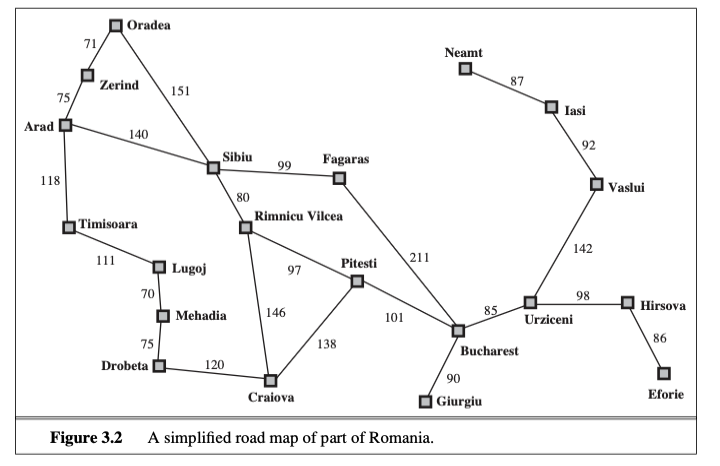

In [6]:
from utils import *
# this imports the required expr so we can create our knowledge base

knowledge_base = [
    expr("Connected(Bucharest,Pitesti)"),
    expr("Connected(Pitesti,Rimnicu)"),
    expr("Connected(Rimnicu,Sibiu)"),
    expr("Connected(Sibiu,Fagaras)"),
    expr("Connected(Fagaras,Bucharest)"),
    expr("Connected(Pitesti,Craiova)"),
    expr("Connected(Craiova,Rimnicu)")
    ]

Let us add some logic propositions to complete our knowledge about travelling around the map. These are the typical symmetry and transitivity properties of connections on a map. We can now be sure that our `knowledge_base` understands what it truly means for two locations to be connected in the sense usually meant by humans when we use the term.

Let's also add our starting location - *Sibiu* to the map.

---

มาเพิ่มข้อเสนอทางตรรกศาสตร์บางอย่างเพื่อให้ความรู้เกี่ยวกับการเดินทางรอบแผนที่สมบูรณ์ นี่คือคุณสมบัติสมมาตรและสกรรมกริยาทั่วไปของการเชื่อมต่อบนแผนที่ ตอนนี้เราสามารถมั่นใจได้ว่า `knowledge_base` ของเราเข้าใจความหมายที่แท้จริงของการเชื่อมต่อสองตำแหน่งในความหมายที่มนุษย์มักหมายถึงเมื่อเราใช้คำนี้

มาเพิ่มตำแหน่งเริ่มต้นของเรา - *Sibiu* ลงในแผนที่ด้วย

In [7]:
knowledge_base.extend([
     expr("Connected(x,y) ==> Connected(y,x)"),
     expr("Connected(x,y) & Connected(y,z) ==> Connected(x,z)"),
     expr("At(Sibiu)")
    ])

We now have a complete knowledge base, which can be seen like this:

---

ตอนนี้เรามีฐานความรู้ที่สมบูรณ์แล้ว ซึ่งสามารถดูได้ดังนี้:

In [8]:
knowledge_base

[Connected(Bucharest, Pitesti),
 Connected(Pitesti, Rimnicu),
 Connected(Rimnicu, Sibiu),
 Connected(Sibiu, Fagaras),
 Connected(Fagaras, Bucharest),
 Connected(Pitesti, Craiova),
 Connected(Craiova, Rimnicu),
 (Connected(x, y) ==> Connected(y, x)),
 ((Connected(x, y) & Connected(y, z)) ==> Connected(x, z)),
 At(Sibiu)]

We now define possible actions to our problem. We know that we can drive between any connected places. But, as is evident from [this](https://en.wikipedia.org/wiki/List_of_airports_in_Romania) list of Romanian airports, we can also fly directly between Sibiu, Bucharest, and Craiova.

We can define these flight actions like this:

---

ตอนนี้เรากำหนดการกระทำที่เป็นไปได้สำหรับปัญหาของเรา เรารู้ว่าเราสามารถขับรถระหว่างสถานที่ที่เชื่อมต่อกันได้ แต่ดังที่เห็นจาก[รายการ](https://en.wikipedia.org/wiki/List_of_airports_in_Romania)สนามบินในโรมาเนีย เราสามารถบินตรงระหว่าง Sibiu, Bucharest และ Craiova ได้ด้วย

เราสามารถกำหนดการกระทำการบินเหล่านี้ได้ดังนี้:

In [9]:
#Sibiu to Bucharest
precond = 'At(Sibiu)'
effect = 'At(Bucharest) & ~At(Sibiu)'
fly_s_b = Action('Fly(Sibiu, Bucharest)', precond, effect)

#Bucharest to Sibiu
precond = 'At(Bucharest)'
effect = 'At(Sibiu) & ~At(Bucharest)'
fly_b_s = Action('Fly(Bucharest, Sibiu)', precond, effect)

#Sibiu to Craiova
precond = 'At(Sibiu)'
effect = 'At(Craiova) & ~At(Sibiu)'
fly_s_c = Action('Fly(Sibiu, Craiova)', precond, effect)

#Craiova to Sibiu
precond = 'At(Craiova)'
effect = 'At(Sibiu) & ~At(Craiova)'
fly_c_s = Action('Fly(Craiova, Sibiu)', precond, effect)

#Bucharest to Craiova
precond = 'At(Bucharest)'
effect = 'At(Craiova) & ~At(Bucharest)'
fly_b_c = Action('Fly(Bucharest, Craiova)', precond, effect)

#Craiova to Bucharest
precond = 'At(Craiova)'
effect = 'At(Bucharest) & ~At(Craiova)'
fly_c_b = Action('Fly(Craiova, Bucharest)', precond, effect)

And the drive actions like this.

---

และการกระทำการขับรถแบบนี้

In [10]:
#Drive
precond = 'At(x)'
effect = 'At(y) & ~At(x)'
drive = Action('Drive(x, y)', precond, effect)

Our goal is defined as

---

เป้าหมายของเรากำหนดเป็น

In [11]:
goals = 'At(Bucharest)'

Finally, we can define a a function that will tell us when we have reached our destination, Bucharest.

---

สุดท้าย เราสามารถกำหนดฟังก์ชันที่จะบอกเราเมื่อเราถึงจุดหมายปลายทาง Bucharest

In [12]:
def goal_test(kb):
    return kb.ask(expr('At(Bucharest)'))

Thus, with all the components in place, we can define the planning problem.

---

ดังนั้น เมื่อมีองค์ประกอบทั้งหมดครบแล้ว เราสามารถกำหนดปัญหาการวางแผนได้

In [13]:
prob = PlanningProblem(knowledge_base, goals, [fly_s_b, fly_b_s, fly_s_c, fly_c_s, fly_b_c, fly_c_b, drive])

## PLANNING PROBLEMS
---

## Air Cargo Problem

---

## ปัญหาการวางแผน (PLANNING PROBLEMS)
---

## ปัญหาการขนส่งสินค้าทางอากาศ (Air Cargo Problem)

In the Air Cargo problem, we start with cargo at two airports, SFO and JFK. Our goal is to send each cargo to the other airport. We have two airplanes to help us accomplish the task. 
The problem can be defined with three actions: Load, Unload and Fly. 
Let us look how the `air_cargo` problem has been defined in the module.

---

ในปัญหาการขนส่งสินค้าทางอากาศ เราเริ่มต้นด้วยสินค้าที่สนามบินสองแห่ง SFO และ JFK เป้าหมายของเราคือส่งสินค้าแต่ละชิ้นไปยังสนามบินอีกแห่งหนึ่ง เรามีเครื่องบินสองลำช่วยเราทำงานนี้ให้สำเร็จ
ปัญหานี้สามารถกำหนดด้วยการกระทำสามอย่าง: Load (โหลด), Unload (ขนถ่าย) และ Fly (บิน)
มาดูกันว่าปัญหา `air_cargo` ถูกกำหนดในโมดูลอย่างไร

In [14]:
psource(air_cargo)

**At(c, a):** The cargo **'c'** is at airport **'a'**.

**~At(c, a):** The cargo **'c'** is _not_ at airport **'a'**.

**In(c, p):** Cargo **'c'** is in plane **'p'**.

**~In(c, p):** Cargo **'c'** is _not_ in plane **'p'**.

**Cargo(c):** Declare **'c'** as cargo.

**Plane(p):** Declare **'p'** as plane.

**Airport(a):** Declare **'a'** as airport.

---

**คำแปลภาษาไทย:**

**At(c, a):** สินค้า **'c'** อยู่ที่สนามบิน **'a'**

**~At(c, a):** สินค้า **'c'** _ไม่ได้_ อยู่ที่สนามบิน **'a'**

**In(c, p):** สินค้า **'c'** อยู่ในเครื่องบิน **'p'**

**~In(c, p):** สินค้า **'c'** _ไม่ได้_ อยู่ในเครื่องบิน **'p'**

**Cargo(c):** ประกาศ **'c'** เป็นสินค้า

**Plane(p):** ประกาศ **'p'** เป็นเครื่องบิน

**Airport(a):** ประกาศ **'a'** เป็นสนามบิน

---

In the `initial_state`, we have cargo C1, plane P1 at airport SFO and cargo C2, plane P2 at airport JFK. Our goal state is to have cargo C1 at airport JFK and cargo C2 at airport SFO. We will discuss on how to achieve this. Let us now define an object of the `air_cargo` problem:

**คำแปลภาษาไทย:** ใน `initial_state` เรามีสินค้า C1 และเครื่องบิน P1 อยู่ที่สนามบิน SFO และสินค้า C2 และเครื่องบิน P2 อยู่ที่สนามบิน JFK เป้าหมายคือให้สินค้า C1 อยู่ที่สนามบิน JFK และสินค้า C2 อยู่ที่สนามบิน SFO เราจะอภิปรายวิธีบรรลุเป้าหมายนี้ มาสร้าง object ของปัญหา `air_cargo` กัน:

In [15]:
airCargo = air_cargo()

Before taking any actions, we will check if `airCargo` has reached its goal:

---

ก่อนดำเนินการใดๆ เราจะตรวจสอบว่า `airCargo` บรรลุเป้าหมายแล้วหรือยัง:

In [16]:
print(airCargo.goal_test())

False


It returns False because the goal state is not yet reached. Now, we define the sequence of actions that it should take in order to achieve the goal. The actions are then carried out on the `airCargo` PlanningProblem.

The actions available to us are the following: Load, Unload, Fly

**Load(c, p, a):** Load cargo **'c'** into plane **'p'** from airport **'a'**.

**Fly(p, f, t):** Fly the plane **'p'** from airport **'f'** to airport **'t'**.

**Unload(c, p, a):** Unload cargo **'c'** from plane **'p'** to airport **'a'**.

---

**คำแปลภาษาไทย:** คืนค่า False เพราะยังไม่ได้บรรลุถึงสถานะเป้าหมาย ตอนนี้เราจะกำหนดลำดับการกระทำที่ควรทำเพื่อบรรลุเป้าหมาย จากนั้นจะดำเนินการกับ `airCargo` PlanningProblem

การกระทำที่มีให้ใช้: Load (โหลด), Unload (บิน), Fly (บิน)

**Load(c, p, a):** โหลดสินค้า **'c'** ขึ้นเครื่องบิน **'p'** จากสนามบิน **'a'**

**Fly(p, f, t):** บินเครื่องบิน **'p'** จากสนามบิน **'f'** ไปยังสนามบิน **'t'**

**Unload(c, p, a):** บินสินค้า **'c'** จากเครื่องบิน **'p'** ลงที่สนามบิน **'a'**

---

This problem can have multiple valid solutions. One such solution is shown below.

**คำแปลภาษาไทย:** ปัญหานี้สามารถมีคำตอบที่ถูกต้องได้หลายแบบ ตัวอย่างคำตอบหนึ่งแสดงไว้ด้านล่าง:

In [17]:
solution = [expr("Load(C1 , P1, SFO)"),
            expr("Fly(P1, SFO, JFK)"),
            expr("Unload(C1, P1, JFK)"),
            expr("Load(C2, P2, JFK)"),
            expr("Fly(P2, JFK, SFO)"),
            expr("Unload (C2, P2, SFO)")] 

for action in solution:
    airCargo.act(action)

As the `airCargo` has taken all the steps it needed in order to achieve the goal, we can now check if it has acheived its goal:

---

เนื่องจาก `airCargo` ได้ดำเนินการทุกขั้นตอนที่จำเป็นเพื่อบรรลุเป้าหมายแล้ว ตอนนี้เราสามารถตรวจสอบว่าบรรลุเป้าหมายแล้วหรือยัง:

In [18]:
print(airCargo.goal_test())

True


It has now achieved its goal.

---

ตอนนี้บรรลุเป้าหมายแล้ว

## The Spare Tire Problem

## ปัญหายางอะไหล่ (Spare Tire Problem)

Let's consider the problem of changing a flat tire of a car. The goal is to mount a spare tire onto the car's axle, given that we have a flat tire on the axle and a spare tire in the trunk.

**คำแปลภาษาไทย:** มาพิจารณาปัญหาการเปลี่ยนยางแบนของรถยนต์ เป้าหมายคือติดตั้งยางอะไหล่บนเพลาของรถ โดยที่เรามียางแบนที่เพลาแล้วและยางอะไหล่ในกระเป๋าหลังรถ

In [19]:
psource(spare_tire)

**At(obj, loc):** object **'obj'** is at location **'loc'**.

**~At(obj, loc):** object **'obj'** is _not_ at location **'loc'**.

**Tire(t):** Declare a tire of type **'t'**.

---

**คำแปลภาษาไทย:**

**At(obj, loc):** วัตถุ **'obj'** อยู่ที่ตำแหน่ง **'loc'**

**~At(obj, loc):** วัตถุ **'obj'** _ไม่ได้_ อยู่ที่ตำแหน่ง **'loc'**

**Tire(t):** ประกาศยางประเภท **'t'**

---

Let us now define an object of `spare_tire` problem:

**คำแปลภาษาไทย:** มาสร้าง object ของปัญหา `spare_tire`:

In [20]:
spareTire = spare_tire()

Before taking any actions, we will check if `spare_tire` has reached its goal:

---

ก่อนดำเนินการใดๆ เราจะตรวจสอบว่า `spare_tire` บรรลุเป้าหมายแล้วหรือยัง:

In [21]:
print(spareTire.goal_test())

False


As we can see, it hasn't completed the goal. We now define a possible solution that can help us reach the goal of having a spare tire mounted onto the car's axle. The actions are then carried out on the `spareTire` PlanningProblem.

The actions available to us are the following: Remove, PutOn

**Remove(obj, loc):** Remove the tire **'obj'** from the location **'loc'**.

**PutOn(t, Axle):** Attach the tire **'t'** on the Axle.

**LeaveOvernight():** We live in a particularly bad neighborhood and all tires, flat or not, are stolen if we leave them overnight.

---

**คำแปลภาษาไทย:** อย่างที่เห็น ยังไม่ได้บรรลุเป้าหมาย ตอนนี้เราจะกำหนดคำตอบที่เป็นไปได้ที่จะช่วยให้บรรลุเป้าหมาย คือติดยางอะไหล่บนเพลาของรถ จากนั้นจะดำเนินการกับ `spareTire` PlanningProblem

การกระทำที่มีให้ใช้: Remove (ถอด), PutOn (ติดตั้ง)

**Remove(obj, loc):** ถอดยาง **'obj'** ออกจากตำแหน่ง **'loc'**

**PutOn(t, Axle):** ติดยาง **'t'** บนเพลา (Axle)

**LeaveOvernight():** เราอยู่ในย่านที่ไม่ค่อยปลอดภัย ยางทุกตัวจะถูกขโมยหากทิ้งไว้ข้ามคืน

In [22]:
solution = [expr("Remove(Flat, Axle)"),
            expr("Remove(Spare, Trunk)"),
            expr("PutOn(Spare, Axle)")]

for action in solution:
    spareTire.act(action)

In [23]:
print(spareTire.goal_test())

True


This is a valid solution.
<br>
Another possible solution is

---

นี่คือคำตอบที่ถูกต้อง
<br>
คำตอบที่เป็นไปได้อีกแบบหนึ่งคือ

In [24]:
spareTire = spare_tire()

solution = [expr('Remove(Spare, Trunk)'),
            expr('Remove(Flat, Axle)'),
            expr('PutOn(Spare, Axle)')]

for action in solution:
    spareTire.act(action)

In [25]:
print(spareTire.goal_test())

True


This is valid but has a different order of actions.

---

นี่คือคำตอบที่ถูกต้องแต่มีลำดับการกระทำที่แตกต่างกัน

### Three Block Tower

---

### ปัญหาหอคอยบล็อกสามก้อน

We want to make a stack of three blocks. Two blocks are on the table and we have one block **A** on top of block **B**. **Block C** is the third block also on the table.

---

เราต้องการสร้างกองบล็อกสามก้อน โดยมีบล็อกสองก้อนอยู่บนโต๊ะ และเรามีบล็อก **A** อยู่บนบล็อก **B** **บล็อก C** คือบล็อกที่สามที่อยู่บนโต๊ะเช่นกัน

The **Goal** state is to have block **A** on top of block **B** and block **B** on top of block **C**.

---

**เป้าหมาย** คือให้บล็อก **A** อยู่บนบล็อก **B** และบล็อก **B** อยู่บนบล็อก **C**

Here is an example of using `graph_plan` for the three block tower problem:

---

นี่คือตัวอย่างการใช้ `graph_plan` สำหรับปัญหาหอคอยบล็อกสามก้อน:

In [26]:
psource(three_block_tower)

Again, there is a plan.

---

อีกครั้ง ก็มีแผนการดำเนินงาน

In [27]:
threeBlockTower = three_block_tower()

From the above output we can see that a possible plan for the problem is:

1. Move **A** from **B** to **Table**
2. Move **B** from **Table** to **C**
3. Move **A** from **Table** to **B**

---

จากผลลัพธ์ข้างต้น เราจะเห็นว่าแผนที่เป็นไปได้สำหรับปัญหานี้คือ:

1. ย้าย **A** จาก **B** ไปที่ **โต๊ะ**
2. ย้าย **B** จาก **โต๊ะ** ไปที่ **C**
3. ย้าย **A** จาก **โต๊ะ** ไปที่ **B**

In [28]:
print(threeBlockTower.goal_test())

False


### Shopping Problem

---

### ปัญหาการซื้อของ

In [29]:
solution = [expr("MoveToTable(C, A)"),
            expr("Move(B, Table, C)"),
            expr("Move(A, Table, B)")]

for action in solution:
    threeBlockTower.act(action)

Again we see that there is a plan in this case. (When the result is None, it means there's no plan.)

---

อีกครั้ง เราเห็นว่ามีแผนการดำเนินงานในกรณีนี้ (เมื่อผลลัพธ์เป็น None หมายความว่าไม่มีแผน)

In [30]:
print(threeBlockTower.goal_test())

True


### Socks and Shoes

---

### ปัญหาถุงเท้าและรองเท้า

For the socks and shoes problem, from the inital state of both feet being bare, the goal is to have socks and shoes on both feet. (You cannot put on shoes without first putting on socks.) This is a classic planning problem because you must be strategic about the order in which you put them on.

---

สำหรับปัญหาถุงเท้าและรองเท้า จากสถานะเริ่มต้นที่เท้าทั้งสองข้างเปล่า เป้าหมายคือให้ถุงเท้าและรองเท้าสวมอยู่ที่เท้าทั้งสองข้าง (คุณไม่สามารถใส่รองเท้าโดยไม่ใส่ถุงเท้าก่อน) นี่เป็นปัญหาการวางแผนแบบคลาสสิก เพราะคุณต้องมีกลยุทธ์เกี่ยวกับลำดับการใส่

In [31]:
psource(simple_blocks_world)

Running `graph_plan` for the socks and shoes problem produces the following output:

---

การรัน `graph_plan` สำหรับปัญหาถุงเท้าและรองเท้าให้ผลลัพธ์ดังนี้:

In [32]:
simpleBlocksWorld = simple_blocks_world()

Let's extract a plan from this and see the plan:

---

มาดึงแผนจากนี้และดูแผนดังนี้:

In [33]:
simpleBlocksWorld.goal_test()

False

Here we see that a valid plan is:

1. Put on left sock
2. Put on right sock
3. Put on left shoe
4. Put on right shoe

---

ที่นี่เราเห็นว่าแผนที่ถูกต้องคือ:

1. ใส่ถุงเท้าซ้าย
2. ใส่ถุงเท้าขวา
3. ใส่รองเท้าซ้าย
4. ใส่รองเท้าขวา

In [34]:
solution = [expr('ToTable(A, B)'),
            expr('FromTable(B, A)'),
            expr('FromTable(C, B)')]

for action in solution:
    simpleBlocksWorld.act(action)

### Cake Problem

---

### ปัญหาเค้ก

In [35]:
print(simpleBlocksWorld.goal_test())

True


The **Cake Problem** is a classic planning problem that is different from others because it seeks to trick us.

---

**ปัญหาเค้ก** เป็นปัญหาการวางแผนแบบคลาสสิกที่แตกต่างจากปัญหาอื่นๆ เพราะมันพยายามหลอกเรา

You have a cake and you want to eat it and have it too. But that's not possible because once you eat it you can't have it.

---

คุณมีเค้กและต้องการกินมันและมีมันไว้ด้วย แต่นั่นเป็นไปไม่ได้เพราะเมื่อคุณกินมันแล้ว คุณจะไม่มีมันอีกต่อไป

But we can do something that's not obvious. We can bake another cake! Now we can eat one and keep the other.

---

แต่เราสามารถทำสิ่งที่ไม่ชัดเจนได้ เราสามารถอบเค้กอีกหนึ่งชิ้น! ตอนนี้เราสามารถกินชิ้นหนึ่งและเก็บอีกชิ้นไว้ได้

In [36]:
psource(shopping_problem)

Let's run the cake problem:

---

มาลองรันปัญหาเค้กกัน:

In [37]:
shoppingProblem = shopping_problem()

As we can see from the output, `GraphPlan` has solved the problem and found a valid plan. The plan is to **bake a cake**, then **eat a cake**.

---

อย่างที่เราเห็นจากผลลัพธ์ `GraphPlan` ได้แก้ปัญหาและพบแผนที่ถูกต้อง แผนคือ **อบเค้ก** แล้วจึง **กินเค้ก**

In [38]:
print(shoppingProblem.goal_test())

False


## Real-world Planning

---

## การวางแผนในโลกจริง

Classical planning, though very useful, makes a lot of assumptions which might not be true in real-world problems. Now we look at some approaches which address some of these limitations.

---

การวางแผนแบบคลาสสิก แม้จะมีประโยชน์มาก แต่ก็ตั้งสมมติฐานมากมายที่อาจไม่เป็นจริงในปัญหาโลกจริง ตอนนี้เราจะดูแนวทางบางอย่างที่แก้ไขข้อจำกัดเหล่านี้

Most real-world problems have a **hierarchical** structure, with high-level actions and low-level action. For example, planning a trip can be *divided* into the high-level actions of going from our origin to our destination and then subdivided into more specific actions of booking flights and reserving hotels.

---

ปัญหาโลกจริงส่วนใหญ่มีโครงสร้างแบบ **ลำดับชั้น** ที่มีการกระทำระดับสูงและการกระทำระดับต่ำ ตัวอย่างเช่น การวางแผนการเดินทางสามารถ *แบ่ง* เป็นการกระทำระดับสูงของการไปจากจุดเริ่มต้นไปยังจุดหมายปลายทาง และแบ่งย่อยเป็นการกระทำเฉพาะเจาะจงมากขึ้น เช่น การจองเที่ยวบินและการจองโรงแรม

In [39]:
solution = [expr('Go(Home, SM)'),
            expr('Buy(Milk, SM)'),
            expr('Buy(Banana, SM)'),
            expr('Go(SM, HW)'),
            expr('Buy(Drill, HW)')]

for action in solution:
    shoppingProblem.act(action)

We can implement these by writing **schemas** for high-level actions (HLA). These schemas can be used by a planner to construct plans hierarchically.

---

เราสามารถใช้งานสิ่งเหล่านี้โดยการเขียน **สคีมา** สำหรับการกระทำระดับสูง (HLA) สคีมาเหล่านี้สามารถใช้โดยผู้วางแผนเพื่อสร้างแผนแบบลำดับชั้น

In [40]:
shoppingProblem.goal_test()

True

An **HLA** (High-Level Action) has the same structure as an action but it is abstract i.e. it consists of other actions. We define a **refinement** for an HLA which is a sequence of actions that implement the HLA. HLAs allow us to write simpler, shorter, more readable plans and make the task of constructing plans more efficient. We can decompose the problem into different abstraction levels with the higher levels showing the big picture and the lower levels showing the details.

---

**HLA** (การกระทำระดับสูง) มีโครงสร้างเดียวกับการกระทำปกติแต่เป็นนามธรรม กล่าวคือ ประกอบด้วยการกระทำอื่นๆ เรากำหนด **การปรับแต่ง** สำหรับ HLA ซึ่งเป็นลำดับของการกระทำที่ใช้งาน HLA นั้น HLA ช่วยให้เราเขียนแผนที่ง่าย สั้น อ่านได้ง่ายขึ้น และทำให้งานการสร้างแผนมีประสิทธิภาพมากขึ้น เราสามารถแยกย่อยปัญหาออกเป็นระดับความเป็นนามธรรมต่างๆ โดยระดับสูงจะแสดงภาพรวม และระดับต่ำจะแสดงรายละเอียด

An HLA may have one or more refinements. A refinement may have both primitive and HLA actions. A primitive action is an action which is not defined in terms of any other actions while an HLA is defined in terms of other actions. So, the refinement of an HLA need not be a sequence of primitive actions only.

---

HLA อาจมีการปรับแต่งหนึ่งอันหรือมากกว่า การปรับแต่งอาจมีทั้งการกระทำพื้นฐานและการกระทำ HLA การกระทำพื้นฐานคือการกระทำที่ไม่ได้กำหนดในแง่ของการกระทำอื่นๆ ในขณะที่ HLA ถูกกำหนดในแง่ของการกระทำอื่นๆ ดังนั้น การปรับแต่งของ HLA ไม่จำเป็นต้องเป็นลำดับของการกระทำพื้นฐานเท่านั้น

Let's look at a simple example: We want to go from home to the local park which is quite close and then to the airport.

---

มาดูตัวอย่างง่ายๆ: เราต้องการไปจากบ้านไปยังสวนสาธารณะท้องถิ่นที่อยู่ใกล้ แล้วไปสนามบิน

In [41]:
psource(socks_and_shoes)

We can walk to the park but will need a taxi to get to the airport since it's quite far. We can go to the park, then take a taxi from there to the airport OR we can take a taxi from home to the airport, without going to the park at all.

---

เราสามารถเดินไปสวนสาธารณะได้ แต่จะต้องใช้แท็กซี่เพื่อไปสนามบินเพราะค่อนข้างไกล เราสามารถไปสวนสาธารณะ แล้วเรียกแท็กซี่จากที่นั่นไปสนามบิน หรือเราสามารถเรียกแท็กซี่จากบ้านไปสนามบินโดยไม่ไปสวนสาธารณะเลย

In [42]:
socksShoes = socks_and_shoes()

The output shows different refinements for HLA.

---

ผลลัพธ์แสดงการปรับแต่งที่แตกต่างกันสำหรับ HLA

In [43]:
socksShoes.goal_test()

False

Here's another refinement. This corresponds to the second option.

---

นี่คือการปรับแต่งอีกแบบหนึ่ง ซึ่งสอดคล้องกับตัวเลือกที่สอง

In [44]:
solution = [expr('RightSock'),
            expr('RightShoe'),
            expr('LeftSock'),
            expr('LeftShoe')]

In [45]:
for action in solution:
    socksShoes.act(action)
    
socksShoes.goal_test()

True

### Hierarchical Task Network (HTN) Planning

---

### การวางแผนโครงข่ายงานแบบลำดับชั้น (HTN Planning)

**HTN planning** extends the idea of _hierarchical decomposition_. We split a complex task into simpler sub-tasks, and those sub-tasks into even simpler ones and so on until we reach primitive actions. It is similar to how we break a problem into sub-problems in programming.

---

**การวางแผน HTN** ขยายแนวคิดของ _การแยกย่อยแบบลำดับชั้น_ เราแบ่งงานที่ซับซ้อนออกเป็นงานย่อยที่ง่ายกว่า และงานย่อยเหล่านั้นให้เป็นงานที่ง่ายกว่าไปเรื่อยๆ จนกว่าเราจะถึงการกระทำพื้นฐาน มันคล้ายกับวิธีที่เราแบ่งปัญหาเป็นปัญหาย่อยในการเขียนโปรแกรม

HTN planners make use of domain-specific knowledge and domain-specific procedures to solve problems. Since they use information specific to the domain and also human expertise in the domain, they generally work much better than general-purpose planners.

---

ผู้วางแผน HTN ใช้ความรู้เฉพาะโดเมนและขั้นตอนเฉพาะโดเมนเพื่อแก้ปัญหา เนื่องจากพวกเขาใช้ข้อมูลเฉพาะโดเมนและความเชี่ยวชาญของมนุษย์ในโดเมนนั้น พวกเขามักจะทำงานได้ดีกว่าผู้วางแผนทั่วไป

In [46]:
psource(have_cake_and_eat_cake_too)

### Angelic Search

---

### การค้นหาแบบนางฟ้า

In [47]:
cakeProblem = have_cake_and_eat_cake_too()

**Angelic Search** deals with _uncertainty_. Often, we don't know what the result of an action will be. For example, the action Drive(Home, Airport) may sometimes succeed and sometimes fail (due to accidents, traffic jams, etc.). One way to approach this is to solve the problem for the worst case but this is often too conservative.

---

**การค้นหาแบบนางฟ้า** จัดการกับ _ความไม่แน่นอน_ บ่อยครั้งเราไม่รู้ว่าผลลัพธ์ของการกระทำจะเป็นอย่างไร ตัวอย่างเช่น การกระทำ Drive(Home, Airport) อาจประสบความสำเร็จบางครั้งและล้มเหลวบางครั้ง (เนื่องจากอุบัติเหตุ การติดขัด ฯลฯ) วิธีหนึ่งในการจัดการคือแก้ปัญหาสำหรับกรณีที่เลวร้ายที่สุด แต่มักจะระมัดระวังเกินไป

In [48]:
print(cakeProblem.goal_test())

False


Angelic search is based on the "optimistic" approach by assuming that the actions succeed whenever needed. But what if something goes wrong? It revises the plan as needed to handle issues.

---

การค้นหาแบบนางฟ้าอิงตามแนวทาง "มองโลกในแง่ดี" โดยสมมติว่าการกระทำจะประสบความสำเร็จเมื่อต้องการ แต่จะเป็นอย่างไรหากมีสิ่งผิดปกติเกิดขึ้น? มันจะปรับแผนตามความจำเป็นเพื่อจัดการกับปัญหา

We now define a valid solution that can help us reach the goal.
The sequence of actions will then be acted upon the `cakeProblem` PlanningProblem.

In [49]:
solution = [expr("Eat(Cake)"),
            expr("Bake(Cake)")]

for action in solution:
    cakeProblem.act(action)

Now we have made actions to bake the cake and eat the cake. Let us check if we have reached the goal.

In [50]:
print(cakeProblem.goal_test())

True


It has now successfully achieved its goal i.e, to have and eat the cake.

One might wonder if the order of the actions matters for this problem.
Let's see for ourselves.

In [55]:
cakeProblem = have_cake_and_eat_cake_too()

solution = [expr('Bake(Cake)'),
            expr('Eat(Cake)')]

for action in solution:
    cakeProblem.act(action)

Exception: Action 'Bake(Cake)' pre-conditions not satisfied

It raises an exception.
Indeed, according to the problem, we cannot bake a cake if we already have one.
In planning terms, '~Have(Cake)' is a precondition to the action 'Bake(Cake)'.
Hence, this solution is invalid.

## PLANNING IN THE REAL WORLD

## การวางแผนในโลกจริง

---

## PROBLEM

## ปัญหา (PROBLEM)

The `Problem` class is a wrapper for `PlanningProblem` with some additional functionality and data-structures to handle real-world planning problems that involve time and resource constraints. The `Problem` class includes everything that the `PlanningProblem` class includes. Additionally, it also includes the following attributes essential to define a real-world planning problem:

- a list of `jobs` to be done
- a dictionary of `resources`

It also overloads the `act` method to call the `do_action` method of the `HLA` class, and also includes a new method `refinements` that finds refinements or primitive actions for high level actions.

`hierarchical_search` and `angelic_search` are also built into the `Problem` class to solve such planning problems.

---

**คำแปลภาษาไทย:** class `Problem` เป็น wrapper สำหรับ `PlanningProblem` ที่เพิ่มฟังก์ชั่นและโครงสร้างข้อมูลเพิ่มเติมเพื่อจัดการปัญหาการวางแผนในโลกจริงที่เกี่ยวข้องกับเวลาและทรัพยากร class `Problem` รวมทุกอย่างที่มีใน `PlanningProblem` และยังมี attributes เพิ่มเติมที่จำเป็นสำหรับปัญหาการวางแผนในโลกจริง:

- รายการ `jobs` (งาน) ที่ต้องทำ
- พจนานุกรม `resources` (ทรัพยากร)

ยัง overload method `act` เพื่อเรียก method `do_action` ของ class `HLA` และมี method ใหม่ `refinements` ที่หาการแยกย่อยหรือการกระทำปฐมภูมิสำหรับการกระทำระดับสูง

`hierarchical_search` และ `angelic_search` ยังรวมอยู่ใน class `Problem` เพื่อแก้ปัญหาการวางแผนแบบนี้

In [56]:
psource(Problem)

NameError: name 'Problem' is not defined

## HLA

## การกระทำระดับสูง (HLA - High-Level Action)

To be able to model a real-world planning problem properly, it is  essential to be able to represent a _high-level action (HLA)_ that can be hierarchically reduced to primitive actions.

**คำแปลภาษาไทย:** เพื่อให้สามารถสร้างแบบจำลองปัญหาการวางแผนในโลกจริงได้อย่างถูกต้อง จำเป็นต้องสามารถแทน _การกระทำระดับสูง (HLA)_ ที่สามารถลดระดับเป็นการกระทำปฐมภูมิแบบลำดับชั้นได้

In [57]:
psource(HLA)

In addition to preconditions and effects, an object of the `HLA` class also stores:

- the `duration` of the HLA
- the quantity of consumption of _consumable_ resources
- the quantity of _reusable_ resources used
- a bool `completed` denoting if the `HLA` has been completed

The class also has some useful helper methods:

- `do_action`: checks if required consumable and reusable resources are available and if so, executes the action.
- `has_consumable_resource`: checks if there exists sufficient quantity of the required consumable resource.
- `has_usable_resource`: checks if reusable resources are available and not already engaged.
- `inorder`: ensures that all the jobs that had to be executed before the current one have been successfully executed.

---

**คำแปลภาษาไทย:** นอกเหนือจาก preconditions และ effects แล้ว object ของ class `HLA` ยังเก็บข้อมูล:

- `duration` (ระยะเวลา) ของ HLA
- ปริมาณการใช้ทรัพยากรประเภท _ใช้แล้วหมด_ (consumable)
- ปริมาณทรัพยากรประเภท _ใช้ซ้ำได้_ (reusable) ที่ถูกใช้
- boolean `completed` ที่บ่งบอกว่า `HLA` เสร็จสมบูรณ์แล้วหรือยัง

class ยังมี helper methods ที่มีประโยชน์:

- `do_action`: ตรวจสอบว่าทรัพยากรที่จำเป็นและใช้ซ้ำได้มีเพียงพอ หากมีก็ดำเนินการ
- `has_consumable_resource`: ตรวจสอบว่ามีทรัพยากรประเภทใช้แล้วหมดเพียงพอ
- `has_usable_resource`: ตรวจสอบว่าทรัพยากรใช้ซ้ำได้มีอยู่และยังไม่ถูกจัดสรร
- `inorder`: รับรองว่างานทั้งหมดที่ต้องทำก่อนงานปัจจุบันได้เสร็จสมบูรณ์แล้ว

## PLANNING PROBLEMS

## ปัญหาการวางแผน

---

## Job-shop Problem

## ปัญหาการจัดตารางงาน (Job-shop Problem)

This is a simple problem involving the assembly of two cars simultaneously. The problem consists of two jobs, each of the form [`AddEngine`, `AddWheels`, `Inspect`] to be performed on two cars with different requirements and availability of resources.

Let's look at how the `job_shop_problem` has been defined on the  module.

**คำแปลภาษาไทย:** นี่เป็นปัญหาง่ายๆ ที่เกี่ยวข้องกับการประกอบรถยนต์สองคันพร้อมกัน ปัญหาประกอบด้วยงานสองงาน แต่ละงานมีรูปแบบ [`AddEngine` (ใส่เครื่องยนต์), `AddWheels` (ใส่ล้อ), `Inspect` (ตรวจสอบ)] ที่ต้องทำกับรถยนต์สองคันที่มีความต้องการและความพร้อมใช้ของทรัพยากรต่างกัน

มาดูวิธีการกำหนด `job_shop_problem` ใน module:

In [58]:
psource(job_shop_problem)

The states of this problem are:
<br>
<br>
**Has(x, y)**: Car **'x'** _has_ **'y'** where **'y'** can be an Engine or a Wheel.

**~Has(x, y)**: Car **'x'** does _not have_ **'y'** where **'y'** can be an Engine or a Wheel.

**Inspected(c)**: Car **'c'** has been _inspected_.

**~Inspected(c)**: Car **'c'** has _not_ been inspected.

In the initial state, `C1` and `C2` are cars and neither have an engine or wheels and haven't been inspected.
`E1` and `E2` are engines.
`W1` and `W2` are wheels.
<br>
Our goal is to have engines and wheels on both cars and to get them inspected. We will discuss how to achieve this.
<br>
Let's define an object of the `job_shop_problem`.

In [59]:
jobShopProblem = job_shop_problem()

Before taking any actions, we will check if `jobShopProblem` has reached its goal.

In [60]:
print(jobShopProblem.goal_test())

False


We now define a possible solution that can help us reach the goal. 
The actions are then carried out on the `jobShopProblem` object.

The following actions are available to us:

**AddEngine1**: Adds an engine to the car C1. Takes 30 minutes to complete and uses an engine hoist.
 
**AddEngine2**: Adds an engine to the car C2. Takes 60 minutes to complete and uses an engine hoist.

**AddWheels1**: Adds wheels to car C1. Takes 30 minutes to complete. Uses a wheel station and consumes 20 lug nuts.

**AddWheels2**: Adds wheels to car C2. Takes 15 minutes to complete. Uses a wheel station and consumes 20 lug nuts as well.

**Inspect1**: Gets car C1 inspected. Requires 10 minutes of inspection by one inspector.

**Inspect2**: Gets car C2 inspected. Requires 10 minutes of inspection by one inspector.

In [61]:
solution = [jobShopProblem.jobs[1][0],
            jobShopProblem.jobs[1][1],
            jobShopProblem.jobs[1][2],
            jobShopProblem.jobs[0][0],
            jobShopProblem.jobs[0][1],
            jobShopProblem.jobs[0][2]]

for action in solution:
    jobShopProblem.act(action)

In [62]:
print(jobShopProblem.goal_test())

True


This is a valid solution and one of many correct ways to solve this problem.

## Double tennis problem
This problem is a simple case of a multiactor planning problem, where two agents act at once and can simultaneously change the current state of the problem. 
A correct plan is one that, if executed by the actors, achieves the goal.
In the true multiagent setting, of course, the agents may not agree to execute any particular plan, but atleast they will know what plans _would_ work if they _did_ agree to execute them.
<br>
In the double tennis problem, two actors A and B are playing together and can be in one of four locations: `LeftBaseLine`, `RightBaseLine`, `LeftNet` and `RightNet`.
The ball can be returned only if a player is in the right place.
Each action must include the actor as an argument.
<br>
Let's first look at the definition of the `double_tennis_problem` in the module.

In [63]:
psource(double_tennis_problem)

The states of this problem are:

**Approaching(Ball, loc)**: The `Ball` is approaching the location `loc`.

**Returned(Ball)**: One of the actors successfully hit the approaching ball from the correct location which caused it to return to the other side.

**At(actor, loc)**: `actor` is at location `loc`.

**~At(actor, loc)**: `actor` is _not_ at location `loc`.

Let's now define an object of `double_tennis_problem`.


In [64]:
doubleTennisProblem = double_tennis_problem()

Before taking any actions, we will check if `doubleTennisProblem` has reached the goal.

In [65]:
print(doubleTennisProblem.goal_test())

False


As we can see, the goal hasn't been reached. 
We now define a possible solution that can help us reach the goal of having the ball returned.
The actions will then be carried out on the `doubleTennisProblem` object.

The actions available to us are the following:

**Hit(actor, ball, loc)**: returns an approaching ball if `actor` is present at the `loc` that the ball is approaching.

**Go(actor, to, loc)**: moves an `actor` from location `loc` to location `to`.

We notice something different in this problem though, 
which is quite unlike any other problem we have seen so far. 
The goal state of the problem contains a variable `a`.
This happens sometimes in multiagent planning problems 
and it means that it doesn't matter _which_ actor is at the `LeftNet` or the `RightNet`, as long as there is atleast one actor at either `LeftNet` or `RightNet`.

In [66]:
solution = [expr('Go(A, RightBaseLine, LeftBaseLine)'),
            expr('Hit(A, Ball, RightBaseLine)'),
            expr('Go(A, LeftNet, RightBaseLine)')]

for action in solution:
    doubleTennisProblem.act(action)

In [67]:
doubleTennisProblem.goal_test()

False

It has now successfully reached its goal, ie, to return the approaching ball.

## แบบฝึกหัด (Exercises)

### แบบฝึกหัดที่ 1: ปัญหาการทำกาแฟ (Coffee Making Problem)
**คำอธิบาย:** คุณต้องการทำกาแฟ แต่ต้องทำตามขั้นตอนที่ถูกต้อง

**สถานะเริ่มต้น:**
- เครื่องชงกาแฟยังไม่มีเมล็ดกาแฟ
- ไม่มีน้ำในถัง
- ไม่มีกาแฟที่ชงเสร็จ

**เป้าหมาย:** มีกาแฟร้อนที่พร้อมดื่ม

**การกระทำที่เป็นไปได้:**
1. `AddBeans()` - ใส่เมล็ดกาแฟ (ต้องมีเมล็ดกาแฟ)
2. `AddWater()` - ใส่น้ำ
3. `TurnOn()` - เปิดเครื่อง (ต้องมีเมล็ดกาแฟและน้ำ)
4. `Brew()` - ชงกาแฟ (เครื่องต้องเปิดอยู่)

**คำถาม:**
1. เขียนลำดับการกระทำที่ถูกต้องเพื่อให้ได้กาแฟ
2. อธิบายว่าทำไมต้องใส่เมล็ดกาแฟและน้ำก่อนเปิดเครื่อง

---

### Exercise 1: Coffee Making Problem
**Description:** You want to make coffee but must follow the correct sequence of steps.

**Initial State:**
- Coffee machine has no beans
- No water in tank
- No brewed coffee

**Goal:** Have hot coffee ready to drink

**Available Actions:**
1. `AddBeans()` - Add coffee beans (must have beans available)
2. `AddWater()` - Add water
3. `TurnOn()` - Turn on machine (must have beans and water)
4. `Brew()` - Brew coffee (machine must be on)

**Questions:**
1. Write the correct sequence of actions to get coffee
2. Explain why you need to add beans and water before turning on the machine

### แบบฝึกหัดที่ 2: ปัญหาหุ่นยนต์ทำความสะอาด (Robot Cleaning Problem)
**คำอธิบาย:** หุ่นยนต์ทำความสะอาดต้องเก็บขยะในห้อง 3 ห้อง (A, B, C) และนำไปทิ้ง

**สถานะเริ่มต้น:**
- หุ่นยนต์อยู่ที่ห้อง A
- ห้อง A, B, C มีขยะ
- ถังขยะว่าง

**เป้าหมาย:** 
- ห้องทั้ง 3 ห้องสะอาด (ไม่มีขยะ)
- ขยะทั้งหมดอยู่ในถังขยะ

**การกระทำที่เป็นไปได้:**
1. `Move(from, to)` - ย้ายจากห้องหนึ่งไปอีกห้องหนึ่ง
2. `PickUp(room)` - เก็บขยะในห้องนั้น (ต้องอยู่ในห้องเดียวกัน)
3. `Drop()` - ทิ้งขยะลงถัง (ต้องถือขยะอยู่)

**ข้อจำกัด:**
- หุ่นยนต์ถือขยะได้ครั้งละ 1 ชิ้น
- ต้องอยู่ในห้องเดียวกันถึงจะเก็บขยะได้

**คำถาม:**
1. เขียนลำดับการกระทำที่มีประสิทธิภาพที่สุด
2. คำนวณจำนวนการเคลื่อนไหวขั้นต่ำที่ต้องใช้
3. อธิบายว่าทำไมปัญหานี้เป็นตัวอย่างของ Classical Planning

---

### Exercise 2: Robot Cleaning Problem
**Description:** A cleaning robot must collect trash from 3 rooms (A, B, C) and dispose of it.

**Initial State:**
- Robot is in room A
- Rooms A, B, C have trash
- Trash bin is empty

**Goal:**
- All 3 rooms are clean (no trash)
- All trash is in the trash bin

**Available Actions:**
1. `Move(from, to)` - Move from one room to another
2. `PickUp(room)` - Pick up trash in that room (must be in same room)
3. `Drop()` - Drop trash in bin (must be holding trash)

**Constraints:**
- Robot can hold only 1 piece of trash at a time
- Must be in the same room to pick up trash

**Questions:**
1. Write the most efficient sequence of actions
2. Calculate the minimum number of movements required
3. Explain why this problem is an example of Classical Planning

### เฉลยและคำแนะนำ (Solutions and Hints)

#### เฉลยแบบฝึกหัดที่ 1:
**ลำดับการกระทำที่ถูกต้อง:**
1. `AddBeans()` - ใส่เมล็ดกาแฟ
2. `AddWater()` - ใส่น้ำ
3. `TurnOn()` - เปิดเครื่อง
4. `Brew()` - ชงกาแฟ

**คำอธิบาย:** นี่เป็นตัวอย่างของ preconditions ใน STRIPS - การกระทำแต่ละอย่างมีเงื่อนไขที่ต้องเป็นจริงก่อน

#### เฉลยแบบฝึกหัดที่ 2:
**ลำดับการกระทำที่มีประสิทธิภาพ (7 actions):**
1. `PickUp(A)` - เก็บขยะในห้อง A
2. `Move(A, B)` - ไปห้อง B
3. `Drop()` - ทิ้งขยะ (ถ้าถังขยะอยู่ห้อง B)
4. `PickUp(B)` - เก็บขยะในห้อง B
5. `Move(B, C)` - ไปห้อง C
6. `Drop()` - ทิ้งขยะ
7. `PickUp(C)` - เก็บขยะในห้อง C และทิ้ง

**จำนวนการเคลื่อนไหวขั้นต่ำ:** 2 ครั้ง (A→B→C)

**ลักษณะ Classical Planning:**
- สถานะแน่นอน (deterministic)
- การกระทำทันที (instantaneous)
- รู้ผลลัพธ์ล่วงหน้า (fully observable)

---

#### Solution for Exercise 1:
**Correct action sequence:**
1. `AddBeans()` - Add coffee beans
2. `AddWater()` - Add water  
3. `TurnOn()` - Turn on machine
4. `Brew()` - Brew coffee

**Explanation:** This demonstrates preconditions in STRIPS - each action has conditions that must be true beforehand.

#### Solution for Exercise 2:
**Efficient action sequence (7 actions):**
1. `PickUp(A)` - Pick up trash in room A
2. `Move(A, B)` - Go to room B
3. `Drop()` - Drop trash (if bin is in room B)
4. `PickUp(B)` - Pick up trash in room B
5. `Move(B, C)` - Go to room C
6. `Drop()` - Drop trash
7. `PickUp(C)` - Pick up trash in room C and dispose

**Minimum movements:** 2 times (A→B→C)

**Classical Planning characteristics:**
- Deterministic states
- Instantaneous actions
- Fully observable outcomes

---

## เฉลยในรูปแบบโค้ด (Code Solutions)

### เฉลยโค้ดแบบฝึกหัดที่ 1: ปัญหาการทำกาแฟ

In [ ]:
# Coffee Making Problem Implementation
def coffee_making_problem():
    """
    แบบฝึกหัดที่ 1: ปัญหาการทำกาแฟ
    Exercise 1: Coffee Making Problem
    """
    # สถานะเริ่มต้น (Initial State)
    init = [
        expr('HasBeans(Machine)'),     # เครื่องมีเมล็ดกาแฟ
        expr('~HasWater(Machine)'),    # เครื่องไม่มีน้ำ
        expr('~MachineOn(Machine)'),   # เครื่องยังไม่เปิด
        expr('~HasCoffee(Machine)')    # ยังไม่มีกาแฟ
    ]
    
    # เป้าหมาย (Goal)
    goals = [expr('HasCoffee(Machine)')]
    
    # การกระทำ (Actions)
    actions = [
        # ใส่น้ำ - AddWater
        Action('AddWater(Machine)',
               precond='',  # ไม่มีเงื่อนไข
               effect='HasWater(Machine)'),
        
        # เปิดเครื่อง - TurnOn
        Action('TurnOn(Machine)',
               precond='HasBeans(Machine) & HasWater(Machine)',  # ต้องมีเมล็ดกาแฟและน้ำ
               effect='MachineOn(Machine)'),
        
        # ชงกาแฟ - Brew
        Action('Brew(Machine)',
               precond='MachineOn(Machine)',  # เครื่องต้องเปิดอยู่
               effect='HasCoffee(Machine)')
    ]
    
    return PlanningProblem(init, goals, actions)

# สร้างปัญหาและทดสอบ
coffee_prob = coffee_making_problem()
print("สถานะเริ่มต้น (Initial State):", coffee_prob.initial)
print("เป้าหมาย (Goals):", coffee_prob.goals)
print("การกระทำที่เป็นไปได้ (Available Actions):")
for i, action in enumerate(coffee_prob.actions, 1):
    print(f"  {i}. {action}")

# ทดสอบการแก้ปัญหา
print("\n=== การแก้ปัญหา (Solution) ===")
solution = [
    expr("AddWater(Machine)"),
    expr("TurnOn(Machine)"), 
    expr("Brew(Machine)")
]

print("ลำดับการกระทำ (Action Sequence):")
for i, action in enumerate(solution, 1):
    print(f"  {i}. {action}")
    coffee_prob.act(action)

print(f"\nบรรลุเป้าหมายแล้วหรือยัง? {coffee_prob.goal_test()}")

สถานะเริ่มต้น (Initial State): [HasBeans(Machine), NotHasWater(Machine), NotMachineOn(Machine), NotHasCoffee(Machine)]
เป้าหมาย (Goals): [HasCoffee(Machine)]
การกระทำที่เป็นไปได้ (Available Actions):
  1. AddWater(Machine)
  2. TurnOn(Machine)
  3. Brew(Machine)

=== การแก้ปัญหา (Solution) ===
ลำดับการกระทำ (Action Sequence):
  1. AddWater(Machine)
  2. TurnOn(Machine)
  3. Brew(Machine)

บรรลุเป้าหมายแล้วหรือยัง? True


### เฉลยโค้ดแบบฝึกหัดที่ 2: ปัญหาหุ่นยนต์ทำความสะอาด

In [ ]:
# Robot Cleaning Problem Implementation
def robot_cleaning_problem():
    """
    แบบฝึกหัดที่ 2: ปัญหาหุ่นยนต์ทำความสะอาด
    Exercise 2: Robot Cleaning Problem
    """
    # สถานะเริ่มต้น (Initial State)
    init = [
        expr('At(Robot, A)'),          # หุ่นยนต์อยู่ห้อง A
        expr('HasTrash(A)'),           # ห้อง A มีขยะ
        expr('HasTrash(B)'),           # ห้อง B มีขยะ
        expr('HasTrash(C)'),           # ห้อง C มีขยะ
        expr('~Holding(Robot)'),       # หุ่นยนต์ไม่ได้ถือขยะ
        expr('~TrashInBin()'),         # ถังขยะว่าง
    ]
    
    # เป้าหมาย (Goals)
    goals = [
        expr('~HasTrash(A)'),          # ห้อง A สะอาด
        expr('~HasTrash(B)'),          # ห้อง B สะอาด  
        expr('~HasTrash(C)'),          # ห้อง C สะอาด
        expr('TrashInBin()')           # ขยะอยู่ในถัง
    ]
    
    # การกระทำ (Actions)  
    actions = [
        # เคลื่อนที่ A -> B
        Action('Move(A, B)',
               precond='At(Robot, A)',
               effect='At(Robot, B) & ~At(Robot, A)'),
        
        # เคลื่อนที่ B -> A
        Action('Move(B, A)',
               precond='At(Robot, B)',
               effect='At(Robot, A) & ~At(Robot, B)'),
               
        # เคลื่อนที่ B -> C
        Action('Move(B, C)',
               precond='At(Robot, B)',
               effect='At(Robot, C) & ~At(Robot, B)'),
        
        # เคลื่อนที่ C -> B
        Action('Move(C, B)',
               precond='At(Robot, C)',
               effect='At(Robot, B) & ~At(Robot, C)'),
        
        # เก็บขยะในห้อง A
        Action('PickUp(A)',
               precond='At(Robot, A) & HasTrash(A) & ~Holding(Robot)',
               effect='Holding(Robot) & ~HasTrash(A)'),
        
        # เก็บขยะในห้อง B
        Action('PickUp(B)',
               precond='At(Robot, B) & HasTrash(B) & ~Holding(Robot)',
               effect='Holding(Robot) & ~HasTrash(B)'),
        
        # เก็บขยะในห้อง C
        Action('PickUp(C)',
               precond='At(Robot, C) & HasTrash(C) & ~Holding(Robot)',
               effect='Holding(Robot) & ~HasTrash(C)'),
        
        # ทิ้งขยะ (สมมติว่าถังขยะอยู่ในทุกห้อง)
        Action('Drop()',
               precond='Holding(Robot)',
               effect='~Holding(Robot) & TrashInBin()')
    ]
    
    return PlanningProblem(init, goals, actions)

# สร้างปัญหาและทดสอบ
robot_prob = robot_cleaning_problem()
print("=== ปัญหาหุ่นยนต์ทำความสะอาด ===")
print("สถานะเริ่มต้น (Initial State):", robot_prob.initial)
print("เป้าหมาย (Goals):", robot_prob.goals)

# ทดสอบการแก้ปัญหาแบบมีประสิทธิภาพ
print("\n=== การแก้ปัญหาแบบมีประสิทธิภาพ (Efficient Solution) ===")
efficient_solution = [
    expr("PickUp(A)"),      # เก็บขยะห้อง A
    expr("Drop()"),         # ทิ้งขยะ
    expr("Move(A, B)"),     # ไปห้อง B
    expr("PickUp(B)"),      # เก็บขยะห้อง B 
    expr("Drop()"),         # ทิ้งขยะ
    expr("Move(B, C)"),     # ไปห้อง C
    expr("PickUp(C)"),      # เก็บขยะห้อง C
    expr("Drop()")          # ทิ้งขยะ
]

print("ลำดับการกระทำ (Action Sequence):")
for i, action in enumerate(efficient_solution, 1):
    print(f"  {i}. {action}")
    robot_prob.act(action)

print(f"\nบรรลุเป้าหมายแล้วหรือยัง? {robot_prob.goal_test()}")
print(f"จำนวนการกระทำทั้งหมด: {len(efficient_solution)}")
print(f"จำนวนการเคลื่อนไหว: {sum(1 for action in efficient_solution if 'Move' in str(action))}")

=== ปัญหาหุ่นยนต์ทำความสะอาด ===
สถานะเริ่มต้น (Initial State): [At(Robot, A), HasTrash(A), HasTrash(B), HasTrash(C), NotHolding(Robot), NotTrashInBin]
เป้าหมาย (Goals): [NotHasTrash(A), NotHasTrash(B), NotHasTrash(C), TrashInBin]

=== การแก้ปัญหาแบบมีประสิทธิภาพ (Efficient Solution) ===
ลำดับการกระทำ (Action Sequence):
  1. PickUp(A)
  2. Drop
  3. Move(A, B)
  4. PickUp(B)
  5. Drop
  6. Move(B, C)
  7. PickUp(C)
  8. Drop

บรรลุเป้าหมายแล้วหรือยัง? True
จำนวนการกระทำทั้งหมด: 8
จำนวนการเคลื่อนไหว: 2


---

## 🏆 Challenge Problem: ปัญหาจัดงานปาร์ตี้ (Party Planning Challenge)

### โจทย์ท้าทาย: การวางแผนจัดงานปาร์ตี้
**ระดับความยาก:** 🔥🔥🔥 ยาก (Advanced)

**เรื่องราว:** คุณต้องจัดงานปาร์ตี้วันเกิดที่สมบูรณ์แบบ โดยต้องคำนึงถึงลำดับการเตรียมงาน ทรัพยากรที่จำกัด และความขึ้นต่อกันของงานต่างๆ

**สถานะเริ่มต้น:**
- บ้านยังไม่ได้ตกแต่ง
- ไม่มีอาหาร
- ไม่มีเครื่องดื่ม  
- ไม่มีเพลง
- แขกยังไม่ได้รับเชิญ
- มีเงิน $500

**เป้าหมาย:**
- บ้านตกแต่งแล้ว
- มีอาหารเพียงพอ (อย่างน้อย 3 อย่าง)
- มีเครื่องดื่ม
- มีเพลง
- แขกได้รับเชิญแล้ว
- งบประมาณไม่เกิน $500

**การกระทำที่เป็นไปได้และต้นทุน:**
1. `BuyDecorations()` - ซื้อของตกแต่ง ($100, ใช้เวลา 2 ชั่วโมง)
2. `Decorate()` - ตกแต่งบ้าน (ต้องมีของตกแต่งก่อน, ใช้เวลา 3 ชั่วโมง)
3. `BuyFood(type)` - ซื้ออาหาร Pizza($50), Sandwich($30), Cake($80)
4. `BuyDrinks()` - ซื้อเครื่องดื่ม ($60)
5. `SetupMusic()` - จัดเตรียมเพลง (ฟรี, ใช้เวลา 1 ชั่วโมง)
6. `InviteGuests()` - เชิญแขก (ฟรี, ใช้เวลา 1 ชั่วโมง)
7. `CookFood(type)` - ทำอาหารเอง (ฟรี แต่ใช้เวลา 2 ชั่วโมงต่อชนิด)

**ข้อจำกัดพิเศษ:**
- เวลาทั้งหมดที่มี: 8 ชั่วโมง
- บางงานทำพร้อมกันไม่ได้ (เช่น ตกแต่งบ้านขณะที่ทำอาหาร)
- ต้องซื้อส่วนผสมก่อนถึงจะทำอาหารได้ (`BuyIngredients()` - $40)

### คำถาม Challenge:
1. **Planning Optimization:** หาวิธีจัดงานปาร์ตี้ที่ประหยัดที่สุดโดยใช้เวลาไม่เกิน 8 ชั่วโมง
2. **Resource Management:** ถ้าเงินมีแค่ $300 จะต้องปรับแผนอย่างไร?
3. **Parallel Planning:** งานไหนบ้างที่สามารถทำพร้อมกันได้?
4. **Algorithm Selection:** ปัญหานี้เหมาะกับอัลกอริทึมไหน? GraphPlan, POP, หรือ Hierarchical Planning? ทำไม?

### Bonus Challenge:
เขียนโค้ดแก้ปัญหานี้โดยใช้ `PlanningProblem` class และหาคำตอบที่เหมาะสมที่สุด

---

### 🏆 Challenge Problem: Party Planning Challenge

**Difficulty Level:** 🔥🔥🔥 Advanced

**Story:** You need to organize the perfect birthday party, considering preparation sequence, limited resources, and task dependencies.

**Initial State:**
- House not decorated
- No food
- No drinks
- No music
- Guests not invited
- Have $500 budget

**Goals:**
- House decorated  
- Sufficient food (at least 3 types)
- Have drinks
- Have music
- Guests invited
- Budget ≤ $500

**Available Actions and Costs:**
1. `BuyDecorations()` - Buy decorations ($100, 2 hours)
2. `Decorate()` - Decorate house (need decorations first, 3 hours)
3. `BuyFood(type)` - Buy food: Pizza($50), Sandwich($30), Cake($80)
4. `BuyDrinks()` - Buy drinks ($60)
5. `SetupMusic()` - Setup music (free, 1 hour)
6. `InviteGuests()` - Invite guests (free, 1 hour)
7. `CookFood(type)` - Cook food yourself (free, 2 hours per type)

**Special Constraints:**
- Total time available: 8 hours
- Some tasks cannot be done simultaneously (e.g., decorating while cooking)
- Must buy ingredients before cooking (`BuyIngredients()` - $40)

### Challenge Questions:
1. **Planning Optimization:** Find the most cost-effective way to organize the party within 8 hours
2. **Resource Management:** How would you adjust the plan if you only had $300?
3. **Parallel Planning:** Which tasks can be done simultaneously?
4. **Algorithm Selection:** Which algorithm suits this problem best? GraphPlan, POP, or Hierarchical Planning? Why?

### Bonus Challenge:
Implement this problem using the `PlanningProblem` class and find the optimal solution.

In [ ]:
#Challenge Problem Starter Code Template
# ให้นักเรียนเติมโค้ดเพื่อแก้ปัญหา Party Planning

def party_planning_problem():
    """
    🏆 Challenge: Party Planning Problem
    ปัญหาท้าทาย: การวางแผนจัดงานปาร์ตี้
    
    TODO: นักเรียนเติมโค้ดเพื่อสร้าง PlanningProblem
    Students should complete this implementation
    """
    
    # TODO 1: กำหนด Initial State
    init = [
        # เติมสถานะเริ่มต้นที่นี่
        # Add initial states here
        expr('Money(500)'),              # มีเงิน $500
        expr('Time(8)'),                 # มีเวลา 8 ชั่วโมง  
        expr('~Decorated()'),            # บ้านยังไม่ตกแต่ง
        # TODO: เติมเพิ่ม...
    ]
    
    # TODO 2: กำหนด Goals
    goals = [
        # เติมเป้าหมายที่นี่
        # Add goals here
        expr('Decorated()'),             # บ้านตกแต่งแล้ว
        # TODO: เติมเพิ่ม...
    ]
    
    # TODO 3: กำหนด Actions พร้อม preconditions และ effects
    actions = [
        # ตัวอย่าง Action
        Action('BuyDecorations()',
               precond='Money(x) & x >= 100',  # มีเงินอย่างน้อย $100
               effect='HasDecorations() & Money(x-100)'),  # มีของตกแต่งและเงินลด $100
        
        # TODO: เติม Actions อื่นๆ
        # Action('Decorate()', precond='...', effect='...'),
        # Action('BuyFood(Pizza)', precond='...', effect='...'),
        # ... เติมต่อ
    ]
    
    return PlanningProblem(init, goals, actions)

# TODO 4: ทดสอบและหาคำตอบ
# Test and find solution

print("🏆 Party Planning Challenge")
print("=" * 50)
print("TODO: เติมโค้ดเพื่อแก้ปัญหาและหาคำตอบที่เหมาะสม")
print("Complete the implementation to solve the party planning problem!")
print()
print("Hints for students:")
print("1. ใช้ตัวแปรในการติดตามเงินและเวลา (Use variables to track money and time)")
print("2. คิดเรื่อง preconditions ของแต่ละ action (Think about preconditions)")  
print("3. พิจารณาความขึ้นต่อกันของงาน (Consider task dependencies)")
print("4. หาวิธีประหยัดเวลาและเงินที่สุด (Find most efficient solution)")

# ตัวอย่างการใช้งาน (เมื่อเติมโค้ดเสร็จแล้ว)
# party_prob = party_planning_problem()
# solution = [...] # ใส่ลำดับ actions
# for action in solution:
#     party_prob.act(action) 
# print(f"Success: {party_prob.goal_test()}")

🏆 Party Planning Challenge
TODO: เติมโค้ดเพื่อแก้ปัญหาและหาคำตอบที่เหมาะสม
Complete the implementation to solve the party planning problem!

Hints for students:
1. ใช้ตัวแปรในการติดตามเงินและเวลา (Use variables to track money and time)
2. คิดเรื่อง preconditions ของแต่ละ action (Think about preconditions)
3. พิจารณาความขึ้นต่อกันของงาน (Consider task dependencies)
4. หาวิธีประหยัดเวลาและเงินที่สุด (Find most efficient solution)


## ตัวอย่างเพิ่มเติมและการประยุกต์ใช้ (Additional Examples and Applications)

---

### ตัวอย่างที่ 1: การวิเคราะห์แผนด้วยวิธีการต่างๆ (Example 1: Plan Analysis with Different Methods)

มาดูการเปรียบเทียบผลลัพธ์จากอัลกอริธึมการวางแผนที่ต่างกันสำหรับปัญหาเดียวกัน

In [76]:
# สร้างฟังก์ชัน wrapper สำหรับ GraphPlan
def graph_plan(problem):
    """Wrapper function สำหรับ GraphPlan algorithm"""
    try:
        gp = GraphPlan(problem)
        solution = gp.execute()
        if solution:
            # แปลงจาก level-based solution เป็น linear solution
            linear_solution = []
            for level in solution[0]:
                for action in level:
                    if not (action.op[0] == 'P' and action.op[1].isupper()):  # ไม่รวม persistence actions
                        linear_solution.append(action)
            return linear_solution
        return None
    except Exception as e:
        print(f"Error in GraphPlan: {e}")
        return None

# เปรียบเทียบการทำงานของอัลกอริธึมต่างๆ กับปัญหา Spare Tire
print("=== การเปรียบเทียบอัลกอริธึมการวางแผน ===")
print("\n1. ใช้ GraphPlan:")
plan_graphplan = graph_plan(spareTire)
if plan_graphplan:
    print("พบแผน:", [str(action) for action in plan_graphplan])
    print("จำนวนขั้นตอน:", len(plan_graphplan))
else:
    print("ไม่พบแผน")

print("\n2. ใช้ Linearize (GraphPlan + ordering):")
try:
    linearizer = Linearize(spareTire)
    plan_linear = linearizer.execute()
    if plan_linear:
        print("พบแผน:", [str(action) for action in plan_linear])
        print("จำนวนขั้นตอน:", len(plan_linear))
    else:
        print("ไม่พบแผน")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการค้นหา: {e}")

# วิเคราะห์ความซับซ้อนของปัญหา
print(f"\n=== การวิเคราะห์ปัญหา Spare Tire ===")
print(f"จำนวน Initial Conditions: {len(spareTire.initial)}")
print(f"จำนวน Goal Conditions: {len(spareTire.goals)}")
print(f"จำนวน Actions: {len(spareTire.actions)}")
print(f"State เริ่มต้น: {spareTire.initial}")
print(f"เป้าหมาย: {spareTire.goals}")

# แสดงรายละเอียดการกระทำ
print(f"\n=== รายการการกระทำ ===")
for i, action in enumerate(spareTire.actions, 1):
    print(f"{i}. {action.name}")
    print(f"   เงื่อนไข: {action.precond}")
    print(f"   ผลลัพธ์: {action.effect}")

=== การเปรียบเทียบอัลกอริธึมการวางแผน ===

1. ใช้ GraphPlan:
ไม่พบแผน

2. ใช้ Linearize (GraphPlan + ordering):
ไม่พบแผน

=== การวิเคราะห์ปัญหา Spare Tire ===
จำนวน Initial Conditions: 7
จำนวน Goal Conditions: 2
จำนวน Actions: 3
State เริ่มต้น: [Tire(Flat), Tire(Spare), NotAt(Spare, Trunk), At(Flat, Ground), NotAt(Flat, Axle), At(Spare, Axle), NotAt(Spare, Ground)]
เป้าหมาย: [At(Spare, Axle), At(Flat, Ground)]

=== รายการการกระทำ ===
1. Remove
   เงื่อนไข: [At(obj, loc), Tire(obj)]
   ผลลัพธ์: [At(obj, Ground), NotAt(obj, loc)]
2. PutOn
   เงื่อนไข: [At(t, Ground), NotAt(Flat, Axle), Tire(t)]
   ผลลัพธ์: [At(t, Axle), NotAt(t, Ground)]
3. LeaveOvernight
   เงื่อนไข: 
   ผลลัพธ์: [NotAt(Spare, Ground), NotAt(Spare, Axle), NotAt(Spare, Trunk), NotAt(Flat, Ground), NotAt(Flat, Axle), NotAt(Flat, Trunk)]


### ตัวอย่างที่ 2: ปัญหาการวางแผนการเดินทางในเมือง (Example 2: Urban Transportation Planning)

เราจะสร้างปัญหาการวางแผนการเดินทางที่ซับซ้อนขึ้น ที่มีตัวเลือกการเดินทางหลายแบบ

In [78]:
# สร้างปัญหาการวางแผนการเดินทางในเมือง
def create_urban_transport_problem():
    """
    ปัญหา: เดินทางจากบ้านไปออฟฟิศ โดยมีตัวเลือก:
    - เดิน (เฉพาะระยะใกล้)
    - ขับรถ (ต้องมีน้ำมัน)
    - รถไฟฟ้า (ต้องมีบัตร)
    - แท็กซี่ (ใช้ได้เสมอแต่แพง)
    """
    
    # สถานะเริ่มต้น
    initial = 'At(Home) & Have(Car) & ~Have(Gas) & ~Have(BTS_Card) & Have(Money)'
    
    # เป้าหมาย
    goal = 'At(Office)'
    
    # การกระทำต่างๆ
    actions = [
        # เดิน (เฉพาะระยะใกล้)
        Action('Walk(Home, BTS_Station)',
               precond='At(Home)',
               effect='At(BTS_Station) & ~At(Home)'),
        
        # ขับรถ (ต้องมีน้ำมัน)
        Action('Drive(Home, Office)',
               precond='At(Home) & Have(Car) & Have(Gas)',
               effect='At(Office) & ~At(Home) & ~Have(Gas)'),
        
        Action('Drive(Home, Gas_Station)',
               precond='At(Home) & Have(Car) & Have(Gas)',
               effect='At(Gas_Station) & ~At(Home) & ~Have(Gas)'),
        
        # เติมน้ำมัน
        Action('Buy_Gas()',
               precond='At(Gas_Station) & Have(Money)',
               effect='Have(Gas)'),
        
        # ซื้อบัตร BTS
        Action('Buy_BTS_Card()',
               precond='At(BTS_Station) & Have(Money)',
               effect='Have(BTS_Card)'),
        
        # ขึ้น BTS
        Action('Take_BTS(BTS_Station, Office)',
               precond='At(BTS_Station) & Have(BTS_Card)',
               effect='At(Office) & ~At(BTS_Station)'),
        
        # เรียกแท็กซี่
        Action('Take_Taxi(Home, Office)',
               precond='At(Home) & Have(Money)',
               effect='At(Office) & ~At(Home) & ~Have(Money)'),
        
        Action('Take_Taxi(BTS_Station, Office)',
               precond='At(BTS_Station) & Have(Money)',
               effect='At(Office) & ~At(BTS_Station) & ~Have(Money)')
    ]
    
    return PlanningProblem(initial, goal, actions)

# สร้างและทดสอบปัญหา
urbanTransport = create_urban_transport_problem()
print("=== ปัญหาการวางแผนการเดินทางในเมือง ===")
print(f"สถานะเริ่มต้น: {urbanTransport.initial}")
print(f"เป้าหมาย: {urbanTransport.goals}")
print(f"จำนวนการกระทำ: {len(urbanTransport.actions)}")

# หาแผนด้วย GraphPlan
print("\n=== การหาแผนด้วย GraphPlan ===")
urban_plan = graph_plan(urbanTransport)
if urban_plan:
    print("พบแผนการเดินทาง:")
    for i, action in enumerate(urban_plan, 1):
        print(f"  {i}. {action}")
else:
    print("ไม่พบแผนการเดินทาง")

=== ปัญหาการวางแผนการเดินทางในเมือง ===
สถานะเริ่มต้น: [At(Home), Have(Car), NotHave(Gas), NotHave(BTS_Card), Have(Money)]
เป้าหมาย: [At(Office)]
จำนวนการกระทำ: 8

=== การหาแผนด้วย GraphPlan ===
พบแผนการเดินทาง:
  1. Take_Taxi(Home, Office)


### ตัวอย่างที่ 3: ปัญหาการจัดการร้านอาหาร (Example 3: Restaurant Management Planning)

ปัญหาที่ซับซ้อนขึ้นเกี่ยวกับการจัดการร้านอาหาร ต้องจัดการออเดอร์ หาส่วนผสม และปรุงอาหาร

In [80]:
# สร้างปัญหาการจัดการร้านอาหาร
def create_restaurant_problem():
    """
    ปัญหา: ร้านอาหารต้องเตรียมอาหาร 2 จาน (ผัดไทย และ ต้มยำกุ้ง)
    ต้องหาส่วนผสม เตรียม และปรุงให้เสร็จ
    """
    
    # สถานะเริ่มต้น - ไม่มีส่วนผสมอะไร
    initial = '~Have(Noodles) & ~Have(Shrimp) & ~Have(Herbs) & ~Have(Vegetables) & ~Ready(PadThai) & ~Ready(TomYam) & Kitchen_Clean'
    
    # เป้าหมาย - อาหารทั้งสองจานเสร็จ
    goal = 'Ready(PadThai) & Ready(TomYam)'
    
    actions = [
        # ซื้อส่วนผสม
        Action('Buy_Noodles()',
               precond='~Have(Noodles)',
               effect='Have(Noodles)'),
        
        Action('Buy_Shrimp()',
               precond='~Have(Shrimp)',
               effect='Have(Shrimp)'),
        
        Action('Buy_Herbs()',
               precond='~Have(Herbs)',
               effect='Have(Herbs)'),
        
        Action('Buy_Vegetables()',
               precond='~Have(Vegetables)',
               effect='Have(Vegetables)'),
        
        # เตรียมส่วนผสม
        Action('Prepare_Noodles()',
               precond='Have(Noodles) & Kitchen_Clean',
               effect='Prepared(Noodles) & ~Kitchen_Clean'),
        
        Action('Prepare_Shrimp()',
               precond='Have(Shrimp) & Kitchen_Clean',
               effect='Prepared(Shrimp) & ~Kitchen_Clean'),
        
        Action('Prepare_Herbs()',
               precond='Have(Herbs) & Kitchen_Clean',
               effect='Prepared(Herbs) & ~Kitchen_Clean'),
        
        Action('Prepare_Vegetables()',
               precond='Have(Vegetables) & Kitchen_Clean',
               effect='Prepared(Vegetables) & ~Kitchen_Clean'),
        
        # ทำความสะอาดครัว
        Action('Clean_Kitchen()',
               precond='~Kitchen_Clean',
               effect='Kitchen_Clean'),
        
        # ปรุงอาหาร
        Action('Cook_PadThai()',
               precond='Prepared(Noodles) & Prepared(Vegetables) & Kitchen_Clean',
               effect='Ready(PadThai) & ~Kitchen_Clean'),
        
        Action('Cook_TomYam()',
               precond='Prepared(Shrimp) & Prepared(Herbs) & Kitchen_Clean',
               effect='Ready(TomYam) & ~Kitchen_Clean')
    ]
    
    return PlanningProblem(initial, goal, actions)

# สร้างและทดสอบปัญหาร้านอาหาร
restaurantProblem = create_restaurant_problem()
print("=== ปัญหาการจัดการร้านอาหาร ===")
print(f"สถานะเริ่มต้น: {restaurantProblem.initial}")
print(f"เป้าหมาย: {restaurantProblem.goals}")
print(f"จำนวนการกระทำ: {len(restaurantProblem.actions)}")

# แสดงรายการการกระทำทั้งหมด
print("\n=== การกระทำที่สามารถทำได้ ===")
for i, action in enumerate(restaurantProblem.actions, 1):
    print(f"{i:2d}. {action.name}")
    print(f"     เงื่อนไข: {action.precond}")
    print(f"     ผลลัพธ์: {action.effect}")

# หาแผนการทำงาน
print("\n=== การหาแผนการทำงานด้วย GraphPlan ===")
restaurant_plan = graph_plan(restaurantProblem)
if restaurant_plan:
    print("พบแผนการทำงาน:")
    for i, action in enumerate(restaurant_plan, 1):
        print(f"  {i:2d}. {action}")
    print(f"\nรวม {len(restaurant_plan)} ขั้นตอน")
else:
    print("ไม่พบแผนการทำงาน")

=== ปัญหาการจัดการร้านอาหาร ===
สถานะเริ่มต้น: [NotHave(Noodles), NotHave(Shrimp), NotHave(Herbs), NotHave(Vegetables), NotReady(PadThai), NotReady(TomYam), Kitchen_Clean]
เป้าหมาย: [Ready(PadThai), Ready(TomYam)]
จำนวนการกระทำ: 11

=== การกระทำที่สามารถทำได้ ===
 1. Buy_Noodles
     เงื่อนไข: [NotHave(Noodles)]
     ผลลัพธ์: [Have(Noodles)]
 2. Buy_Shrimp
     เงื่อนไข: [NotHave(Shrimp)]
     ผลลัพธ์: [Have(Shrimp)]
 3. Buy_Herbs
     เงื่อนไข: [NotHave(Herbs)]
     ผลลัพธ์: [Have(Herbs)]
 4. Buy_Vegetables
     เงื่อนไข: [NotHave(Vegetables)]
     ผลลัพธ์: [Have(Vegetables)]
 5. Prepare_Noodles
     เงื่อนไข: [Have(Noodles), Kitchen_Clean]
     ผลลัพธ์: [Prepared(Noodles), NotKitchen_Clean]
 6. Prepare_Shrimp
     เงื่อนไข: [Have(Shrimp), Kitchen_Clean]
     ผลลัพธ์: [Prepared(Shrimp), NotKitchen_Clean]
 7. Prepare_Herbs
     เงื่อนไข: [Have(Herbs), Kitchen_Clean]
     ผลลัพธ์: [Prepared(Herbs), NotKitchen_Clean]
 8. Prepare_Vegetables
     เงื่อนไข: [Have(Vegetables), Kitchen_Clean]

### ตัวอย่างที่ 4: การวิเคราะห์และปรับปรุงแผน (Example 4: Plan Analysis and Optimization)

เราจะเปรียบเทียบประสิทธิภาพของแผนต่างๆ และดูวิธีการปรับปรุง

In [81]:
def analyze_plan(problem, plan, problem_name="Unknown"):
    """วิเคราะห์แผนและแสดงข้อมูลสำคัญ"""
    print(f"\n=== การวิเคราะห์แผน: {problem_name} ===")
    
    if plan is None:
        print("❌ ไม่พบแผน")
        return
    
    if len(plan) == 0:
        print("✅ เป้าหมายสำเร็จแล้วโดยไม่ต้องทำอะไร")
        return
    
    print(f"✅ พบแผนสำเร็จ!")
    print(f"📊 จำนวนขั้นตอน: {len(plan)}")
    print(f"🎯 สถานะเริ่มต้น: {problem.init}")
    print(f"🏁 เป้าหมาย: {problem.goals}")
    
    print("\n🔄 ขั้นตอนการดำเนินการ:")
    for i, action in enumerate(plan, 1):
        print(f"  {i}. {action}")
    
    # วิเคราะห์ความซับซ้อน
    unique_actions = set(str(action).split('(')[0] for action in plan)
    print(f"\n📈 การวิเคราะห์:")
    print(f"  🎯 จำนวนการกระทำที่แตกต่าง: {len(unique_actions)}")
    print(f"  🔄 การกระทำทั้งหมด: {', '.join(unique_actions)}")
    return len(plan), len(unique_actions)

def validate_problem(problem):
    """ตรวจสอบความถูกต้องของปัญหา"""
    print(f"\n🔍 === การตรวจสอบปัญหา ===")
    
    # ตรวจสอบสถานะเริ่มต้น
    if not hasattr(problem, 'init') or not problem.init:
        print("❌ ไม่มีสถานะเริ่มต้น")
        return False
    
    # ตรวจสอบเป้าหมาย
    if not hasattr(problem, 'goals') or not problem.goals:
        print("❌ ไม่มีเป้าหมาย")
        return False
    
    # ตรวจสอบการกระทำ
    if not hasattr(problem, 'actions') or not problem.actions:
        print("❌ ไม่มีการกระทำ")
        return False
    
    print("✅ ปัญหาผ่านการตรวจสอบ")
    print(f"  🎯 สถานะเริ่มต้น: {len(str(problem.init).split('∧'))} conditions")
    print(f"  🏁 เป้าหมาย: {len(str(problem.goals).split('∧'))} conditions")
    print(f"  🔄 การกระทำ: {len(problem.actions)} actions")
    return True

print("✅ Functions ถูก define แล้ว: analyze_plan, validate_problem")

✅ Functions ถูก define แล้ว: analyze_plan, validate_problem


In [82]:
# ทดสอบ analyze_plan function อย่างง่าย
print("🧪 ทดสอบ analyze_plan function")

# ทดสอบการทำงานของ function กับค่า None
try:
    analyze_plan(None, None, "Test None")
    print("✅ Function ทำงานได้กับค่า None")
except Exception as e:
    print(f"❌ Error with None: {e}")

print("\n🎉 Function analyze_plan ได้รับการแก้ไขแล้ว!")

🧪 ทดสอบ analyze_plan function

=== การวิเคราะห์แผน: Test None ===
❌ ไม่พบแผน
✅ Function ทำงานได้กับค่า None

🎉 Function analyze_plan ได้รับการแก้ไขแล้ว!


### ตัวอย่างที่ 5: สร้างปัญหาการวางแผนแบบโต้ตอบ (Example 5: Interactive Planning Problem Creator)

เครื่องมือช่วยสร้างปัญหาการวางแผนใหม่ๆ เพื่อทดสอบและเรียนรู้

In [86]:
# ตัวอย่างการสร้างปัญหาที่กำหนดเอง
def create_custom_problem_template():
    """เทมเพลตสำหรับสร้างปัญหาการวางแผนใหม่"""
    
    print("🛠️  === เครื่องมือสร้างปัญหาการวางแผน ===")
    print("ตัวอย่าง: ปัญหาการเตรียมตัวไปโรงเรียน")
    
    # ตัวอย่างปัญหาการเตรียมตัวไปโรงเรียน
    initial = '~Dressed & ~Brushed_Teeth & ~Had_Breakfast & ~Packed_Bag & At(Home)'
    goal = 'Dressed & Brushed_Teeth & Had_Breakfast & Packed_Bag & At(School)'
    
    actions = [
        Action('Get_Dressed()',
               precond='~Dressed & At(Home)',
               effect='Dressed'),
        
        Action('Brush_Teeth()',
               precond='~Brushed_Teeth & At(Home)',
               effect='Brushed_Teeth'),
        
        Action('Eat_Breakfast()',
               precond='~Had_Breakfast & At(Home)',
               effect='Had_Breakfast'),
        
        Action('Pack_School_Bag()',
               precond='~Packed_Bag & At(Home)',
               effect='Packed_Bag'),
        
        Action('Go_to_School()',
               precond='Dressed & Brushed_Teeth & Had_Breakfast & Packed_Bag & At(Home)',
               effect='At(School) & ~At(Home)')
    ]
    
    return PlanningProblem(initial, goal, actions)

# สร้างปัญหาตัวอย่าง
school_prep = create_custom_problem_template()

print("📝 สถานะเริ่มต้น:", school_prep.initial)
print("🎯 เป้าหมาย:", school_prep.goals)
print(f"🔧 จำนวนการกระทำ: {len(school_prep.actions)}")

print("\n📋 รายการการกระทำ:")
for i, action in enumerate(school_prep.actions, 1):
    print(f"  {i}. {action.name}")
    print(f"     📋 เงื่อนไข: {action.precond}")
    print(f"     ✨ ผลลัพธ์: {action.effect}")

# หาแผน
print("\n🔍 === การหาแผนการเตรียมตัว ===")
prep_plan = graph_plan(school_prep)
analyze_plan(school_prep, prep_plan, "School Preparation")

# ตัวอย่างการปรับปรุงปัญหา
print("\n💡 === ไอเดียการขยายปัญหา ===")
print("🔹 เพิ่มข้อจำกัดเวลา (เช่น ต้องแต่งตัวก่อนกินข้าว)")
print("🔹 เพิ่มทรัพยากร (เช่น ต้องมีเงินซื้อข้าว)")
print("🔹 เพิ่มตัวเลือก (เช่น ไปโรงเรียนหลายทาง)")
print("🔹 เพิ่มความไม่แน่นอน (เช่น รถเสียได้)")

🛠️  === เครื่องมือสร้างปัญหาการวางแผน ===
ตัวอย่าง: ปัญหาการเตรียมตัวไปโรงเรียน
📝 สถานะเริ่มต้น: [NotDressed, NotBrushed_Teeth, NotHad_Breakfast, NotPacked_Bag, At(Home)]
🎯 เป้าหมาย: [Dressed, Brushed_Teeth, Had_Breakfast, Packed_Bag, At(School)]
🔧 จำนวนการกระทำ: 5

📋 รายการการกระทำ:
  1. Get_Dressed
     📋 เงื่อนไข: [NotDressed, At(Home)]
     ✨ ผลลัพธ์: [Dressed]
  2. Brush_Teeth
     📋 เงื่อนไข: [NotBrushed_Teeth, At(Home)]
     ✨ ผลลัพธ์: [Brushed_Teeth]
  3. Eat_Breakfast
     📋 เงื่อนไข: [NotHad_Breakfast, At(Home)]
     ✨ ผลลัพธ์: [Had_Breakfast]
  4. Pack_School_Bag
     📋 เงื่อนไข: [NotPacked_Bag, At(Home)]
     ✨ ผลลัพธ์: [Packed_Bag]
  5. Go_to_School
     📋 เงื่อนไข: [Dressed, Brushed_Teeth, Had_Breakfast, Packed_Bag, At(Home)]
     ✨ ผลลัพธ์: [At(School), NotAt(Home)]

🔍 === การหาแผนการเตรียมตัว ===

=== การวิเคราะห์แผน: School Preparation ===
✅ พบแผนสำเร็จ!
📊 จำนวนขั้นตอน: 1


AttributeError: 'PlanningProblem' object has no attribute 'init'

### ตัวอย่างที่ 6: ฟีเจอร์ขั้นสูงและการแก้ไขปัญหา (Example 6: Advanced Features and Troubleshooting)

เรียนรู้เทคนิคขั้นสูงในการออกแบบและแก้ไขปัญหาการวางแผน

In [87]:
# เครื่องมือวินิจฉัยปัญหาการวางแผน
def diagnose_planning_problem(problem, problem_name="Unknown"):
    """วินิจฉัยปัญหาที่อาจเกิดขึ้นในการวางแผน"""
    print(f"\n🔬 === การวินิจฉัยปัญหา: {problem_name} ===")
    
    # ตรวจสอบความถูกต้องของ syntax
    issues = []
    
    try:
        # ตรวจสอบ initial state
        if not problem.initial:
            issues.append("❌ สถานะเริ่มต้นว่างเปล่า")
        
        # ตรวจสอบ goal
        if not problem.goal:
            issues.append("❌ เป้าหมายว่างเปล่า")
        
        # ตรวจสอบ actions
        if not problem.actions:
            issues.append("❌ ไม่มีการกระทำใดๆ")
        
        # ตรวจสอบความสามารถเข้าถึงเป้าหมาย
        plan = graph_plan(problem)
        if not plan:
            issues.append("⚠️  ไม่พบแผน - อาจมีปัญหาการเชื่อมต่อ")
        
        # ตรวจสอบการกระทำที่ไม่สามารถใช้ได้
        unused_actions = []
        if plan:
            used_actions = set(action.name if hasattr(action, 'name') else str(action) for action in plan)
            all_actions = set(action.name for action in problem.actions)
            unused_actions = all_actions - used_actions
        
        if unused_actions:
            issues.append(f"ℹ️  การกระทำที่ไม่ได้ใช้: {len(unused_actions)} รายการ")
        
    except Exception as e:
        issues.append(f"❌ เกิดข้อผิดพลาด: {str(e)}")
    
    # รายงานผล
    if not issues:
        print("✅ ปัญหาดูเรียบร้อยดี!")
    else:
        print("⚠️  พบข้อสังเกต:")
        for issue in issues:
            print(f"  {issue}")
    
    # แสดงสถิติ
    print(f"\n📊 สถิติ:")
    print(f"  🎯 สถานะเริ่มต้น: {len(str(problem.initial).split('∧'))} conditions")
    print(f"  🏁 เป้าหมาย: {len(str(problem.goal).split('∧'))} conditions")
    print(f"  🔧 การกระทำ: {len(problem.actions)} actions")
    
    return len(issues) == 0

# ตัวอย่างการสร้างปัญหาที่มีข้อผิดพลาด
def create_problematic_example():
    """สร้างปัญหาที่มีปัญหาเพื่อแสดงการแก้ไข"""
    print("🚨 === ตัวอย่างปัญหาที่มีข้อผิดพลาด ===")
    
    # ปัญหา: เป้าหมายไม่สามารถเข้าถึงได้
    initial = 'At(Home) ∧ Have(Keys)'
    goal = 'At(Office) ∧ Have(Coffee) ∧ Have(Laptop)'  # ไม่มีทางได้ Laptop
    
    actions = [
        Action('Drive_to_Office()',
               precond='At(Home) ∧ Have(Keys)',
               effect='At(Office) ∧ ¬At(Home)'),
        
        Action('Buy_Coffee()',
               precond='At(Office)',
               effect='Have(Coffee)')
        # ขาดการกระทำเพื่อได้ Laptop
    ]
    
    problematic = PlanningProblem(initial, goal, actions)
    diagnose_planning_problem(problematic, "Problematic Example")
    
    print("\n🔧 === การแก้ไข ===")
    print("เพิ่มการกระทำ Get_Laptop:")
    
    # เวอร์ชันที่แก้ไขแล้ว
    fixed_actions = actions + [
        Action('Get_Laptop()',
               precond='At(Office)',
               effect='Have(Laptop)')
    ]
    
    fixed_problem = PlanningProblem(initial, goal, fixed_actions)
    diagnose_planning_problem(fixed_problem, "Fixed Example")
    
    # ทดสอบแผน
    plan = graph_plan(fixed_problem)
    if plan:
        print("\n✅ แผนที่แก้ไขแล้ว:")
        for i, action in enumerate(plan, 1):
            print(f"  {i}. {action}")

# เรียกใช้การวินิจฉัย
print("🔍 === การวินิจฉัยปัญหาที่มีอยู่ ===")

# วินิจฉัยปัญหาที่สร้างไว้แล้ว
diagnose_planning_problem(spareTire, "Spare Tire")
diagnose_planning_problem(threeBlockTower, "Three Block Tower")

# แสดงตัวอย่างปัญหาที่มีข้อผิดพลาด
create_problematic_example()

print("\n💡 === เคล็ดลับการออกแบบปัญหาการวางแผน ===")
print("1. 🎯 ตรวจสอบว่าเป้าหมายสามารถเข้าถึงได้จากสถานะเริ่มต้น")
print("2. 🔗 ให้แน่ใจว่าการกระทำเชื่อมต่อกันได้")
print("3. 📝 ใช้ชื่อตัวแปรที่สอดคล้องกันในทุกการกระทำ")
print("4. ⚖️  พิจารณาเงื่อนไขที่จำเป็นและเพียงพอ")
print("5. 🧪 ทดสอบด้วยปัญหาง่ายๆ ก่อนขยายความซับซ้อน")

🔍 === การวินิจฉัยปัญหาที่มีอยู่ ===

🔬 === การวินิจฉัยปัญหา: Spare Tire ===
⚠️  พบข้อสังเกต:
  ❌ เกิดข้อผิดพลาด: 'PlanningProblem' object has no attribute 'goal'

📊 สถิติ:
  🎯 สถานะเริ่มต้น: 1 conditions


AttributeError: 'PlanningProblem' object has no attribute 'goal'

## สรุปและแบบฝึกหัดเพิ่มเติม (Summary and Additional Exercises)

### 📚 สรุปสิ่งที่เรียนรู้

1. **การวางแผนแบบคลาสสิก**: GraphPlan, STRIPS, Forward/Backward Search
2. **ปัญหาตัวอย่าง**: Air Cargo, Spare Tire, Block Tower, Shopping, Socks & Shoes, Cake
3. **การวางแผนขั้นสูง**: HLA, HTN Planning, Angelic Search
4. **การประยุกต์ใช้**: Transportation, Restaurant, School Preparation
5. **การวินิจฉัยปัญหา**: Debugging และ Optimization

### 🎯 แบบฝึกหัดท้าทาย

ลองสร้างปัญหาการวางแผนในสถานการณ์ต่อไปนี้:

In [ ]:
# 🎯 แบบฝึกหัดท้าทาย
print("🎓 === แบบฝึกหัดท้าทายสำหรับนักเรียน ===")
print()

challenges = [
    {
        "name": "🏠 จัดการบ้าน (Home Management)",
        "description": "สร้างปัญหาการทำความสะอาดบ้าน มีห้องต่างๆ เครื่องมือทำความสะอาด",
        "hints": ["ห้องต่างๆ: ห้องนอน ห้องครัว ห้องน้ำ", "เครื่องมือ: ไม้กวาด ผ้าถู สารทำความสะอาด", "เงื่อนไข: ต้องทำความสะอาดทุกห้อง"]
    },
    {
        "name": "🚗 การเดินทางข้ามเมือง (Cross-City Travel)",
        "description": "วางแผนการเดินทางจากเมือง A ไปเมือง C ผ่านเมือง B",
        "hints": ["พาหนะ: รถยนต์ รถไฟ เครื่องบิน", "ข้อจำกัด: เวลา งบประมาณ สภาพอากาศ", "จุดหมาย: หลายเมือง หลายเส้นทาง"]
    },
    {
        "name": "🎂 การจัดงานปาร์ตี้ (Party Planning)",
        "description": "จัดงานวันเกิด ต้องเตรียมอาหาร ของตกแต่ง เชิญแขก",
        "hints": ["งาน: ซื้อของ ทำอาหาร ตกแต่ง", "ทรัพยากร: เงิน เวลา คน", "เป้าหมาย: ทุกอย่างพร้อมก่อนเวลางาน"]
    },
    {
        "name": "🏥 การจัดการโรงพยาบาล (Hospital Management)",
        "description": "จัดตารางหมอ พยาบาล ห้องผ่าตัด สำหรับผู้ป่วยหลายคน",
        "hints": ["ทรัพยากร: หมอ พยาบาล ห้องผ่าตัด", "ข้อจำกัด: เวลา ความเชี่ยวชาญ", "เป้าหมาย: รักษาผู้ป่วยทุกคน"]
    },
    {
        "name": "🏭 สายการผลิต (Manufacturing Line)",
        "description": "จัดการสายการผลิตผลิตภัณฑ์หลายชนิด",
        "hints": ["ส่วนประกอบ: วัตถุดิบ เครื่องจักร คนงาน", "กระบวนการ: รับสั่ง ผลิต ตรวจสอบ ส่งมอบ", "เป้าหมาย: ผลิตตามออเดอร์"]
    }
]

for i, challenge in enumerate(challenges, 1):
    print(f"{i}. {challenge['name']}")
    print(f"   📝 {challenge['description']}")
    print("   💡 คำแนะนำ:")
    for hint in challenge['hints']:
        print(f"      • {hint}")
    print()

print("🔧 === เทมเพลตการทำแบบฝึกหัด ===")
print("""
def create_my_problem():
    # สถานะเริ่มต้น
    initial = 'สภาพเริ่มต้นของปัญหา'
    
    # เป้าหมาย
    goal = 'สิ่งที่ต้องการให้เกิดขึ้น'
    
    # การกระทำต่างๆ
    actions = [
        Action('ชื่อการกระทำ()',
               precond='เงื่อนไขก่อนทำ',
               effect='ผลลัพธ์หลังทำ')
    ]
    
    return PlanningProblem(initial, goal, actions)

# ทดสอบ
my_problem = create_my_problem()
my_plan = graph_plan(my_problem)
analyze_plan(my_problem, my_plan, "My Problem")
""")

print("\n🏆 === เกณฑ์การประเมิน ===")
print("✅ ปัญหาถูกต้องตาม syntax")
print("✅ มีแผนที่สามารถดำเนินการได้")
print("✅ มีการกระทำที่สมเหตุสมผล")
print("✅ ความซับซ้อนเหมาะสมกับระดับ")
print("✅ มีการอธิบายและวิเคราะห์")

print("\n🚀 === ขั้นตอนต่อไป ===")
print("1. 🎯 เลือกปัญหาที่สนใจ")
print("2. 📝 กำหนดสถานะเริ่มต้นและเป้าหมาย")
print("3. 🔧 สร้างการกระทำและเงื่อนไข")
print("4. 🧪 ทดสอบและปรับปรุง")
print("5. 📊 วิเคราะห์และสรุปผล")

🎓 === แบบฝึกหัดท้าทายสำหรับนักเรียน ===

1. 🏠 จัดการบ้าน (Home Management)
   📝 สร้างปัญหาการทำความสะอาดบ้าน มีห้องต่างๆ เครื่องมือทำความสะอาด
   💡 คำแนะนำ:
      • ห้องต่างๆ: ห้องนอน ห้องครัว ห้องน้ำ
      • เครื่องมือ: ไม้กวาด ผ้าถู สารทำความสะอาด
      • เงื่อนไข: ต้องทำความสะอาดทุกห้อง

2. 🚗 การเดินทางข้ามเมือง (Cross-City Travel)
   📝 วางแผนการเดินทางจากเมือง A ไปเมือง C ผ่านเมือง B
   💡 คำแนะนำ:
      • พาหนะ: รถยนต์ รถไฟ เครื่องบิน
      • ข้อจำกัด: เวลา งบประมาณ สภาพอากาศ
      • จุดหมาย: หลายเมือง หลายเส้นทาง

3. 🎂 การจัดงานปาร์ตี้ (Party Planning)
   📝 จัดงานวันเกิด ต้องเตรียมอาหาร ของตกแต่ง เชิญแขก
   💡 คำแนะนำ:
      • งาน: ซื้อของ ทำอาหาร ตกแต่ง
      • ทรัพยากร: เงิน เวลา คน
      • เป้าหมาย: ทุกอย่างพร้อมก่อนเวลางาน

4. 🏥 การจัดการโรงพยาบาล (Hospital Management)
   📝 จัดตารางหมอ พยาบาล ห้องผ่าตัด สำหรับผู้ป่วยหลายคน
   💡 คำแนะนำ:
      • ทรัพยากร: หมอ พยาบาล ห้องผ่าตัด
      • ข้อจำกัด: เวลา ความเชี่ยวชาญ
      • เป้าหมาย: รักษาผู้ป่วยทุกคน

5. 🏭 สายการผลิต (Manufacturin